# Introduction to ggplot
This notebook goes over the basics of ggplot and how to structure a plot command. The ggplot package provides a lot of flexibility and customization for plots and use the same syntax to build a wide variety of plots. In this tutorial we will start with the minimum number of arguments needed to build a ggplot figure and add in customization with each step. 

### Contents
1. [Basic ggplot command](#1)

2. [Aesthetic variables](#2)

   2.1 [Fill](#3)
     
   2.2 [Color](#4)
     
   2.3 [Shape](#5)
     
   2.4 [Size](#6)
     
   2.5 [Alpha](#7)
   

3. [Faceting plots](#8)

   3.1 [facet.grid()](#9)
   
   3.2 [fact.wrap()](#10)


4. [Theme customization](#11)

   4.1 [Panel formatting](#12)
   
   4.2 [Text formatting](#13)
   
   4.3 [Strip formatting](#14)
   
   4.4 [Legend formatting](#15)
   
   4.5 [Setting theme](#16)
   
   
5. [Axis formatting](#17)

6. [Axes labels](#18)

7. [Exporting figures](#19)

Before we start make sure that ggplot2 is installed and the library is properly loaded using the commands below.

In [8]:
install.packages("ggplot2")
install.packages("ggridges")
install.packages("viridis")
library(ggplot2)
library(datasets)
library(ggridges)
library(viridis)


The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpPgRiYP/downloaded_packages

The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpPgRiYP/downloaded_packages

The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpPgRiYP/downloaded_packages


Loading required package: viridisLite



In [3]:
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

<a id="1"></a>
### 1. Basic ggplot command
The first section of this tutorial is going to go over the basic syntax of a ggplot command. The command will always begin with `ggplot()`. The options inside of these parentheses will vary based on the type of plot you're making and how many data layers there will be. To start, let's assume we are plotting a single data layer. The structure of this ggplot command will be `ggplot(data, aes(x,y)) + geom_[plotType]()`. This will give you a basic plot in the form of whatever geom you designate. 

We will use the R iris dataset for the sake of this tutorial. Using this dataset, we can plot the sepal length by species as a boxplot with the following command:

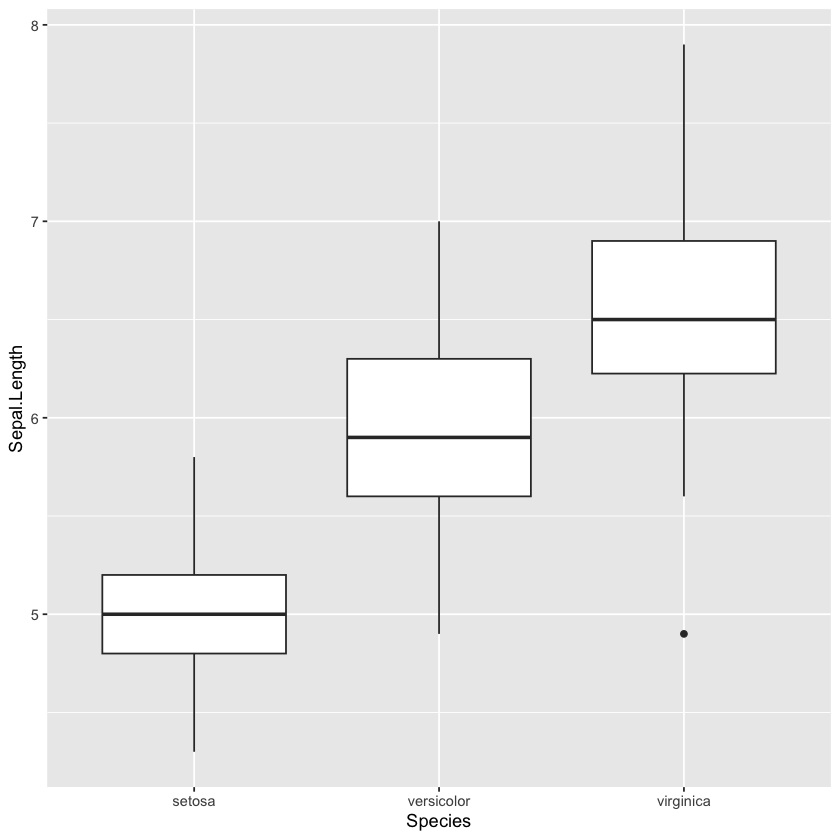

In [5]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot()

As an example of how we can plot the same data in a different plot format by changing the geom, we can use the following command to make a violin plot of the same data:

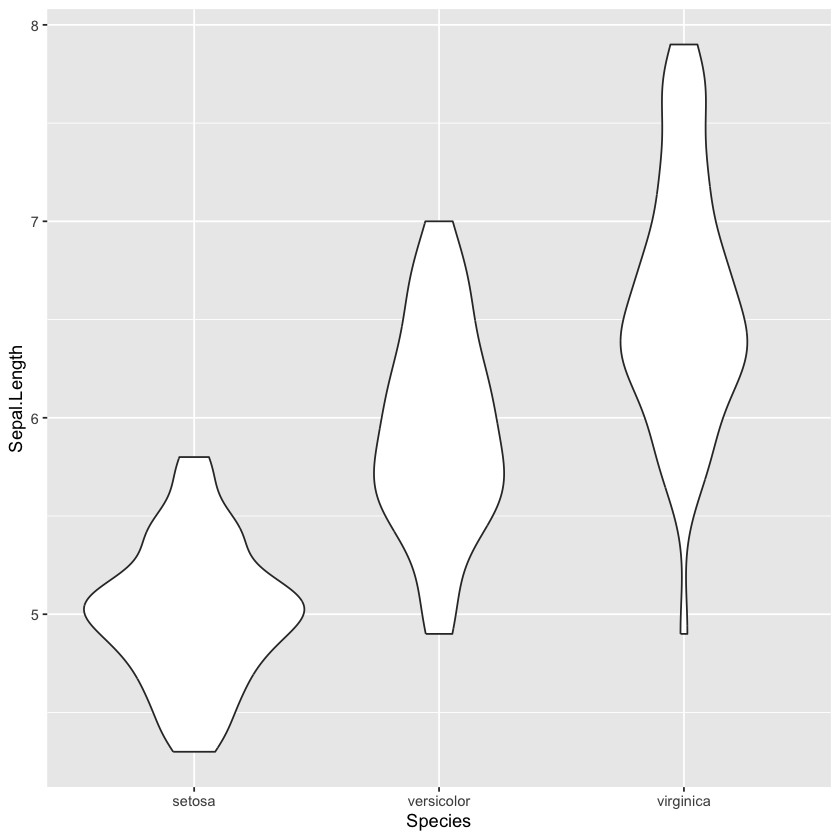

In [6]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_violin()

<a id="2"></a>
### 2. Aesthetic Variables
Aesthetic variables allow us to customize the appearance of our graph by assigning fill or color or other characteristics of our graph to a variable in our data. Aesthetics are set in ggplot using `aes()`. This option can be set in either the `ggplot()` portion of the command or in the `geom_[plotType]` section. The aesthetics set in the `ggplot()` section of the command will be applied to the entire graph. Therefore, if you are using multiple data layers and multiple geom types, it is important to separate your aesthetics into each separate `geom_[plotType]` portion of the command (I will provide examples below). 

Below I have broken down common variables into subsections and provided examples of how we can customize each of them in our graphs using the same iris data.

<a id="3"></a>
#### 2.1 Fill
Fill color refers to the interior color of a shape. We can either designate one fill color for every shape or fill the shapes based on a numeric or categorical variable. Categorical variables will fill with solid colors and numeric variables will fill with gradients or binned color scales.

##### One fill color
To set one fill color we can designate the fill in the `geom_[plotType]()` portion of the command. Because we are not telling the graph that to fill the geoms by a variable, the fill does not go into the `aes()` portion of the command. The following code generates the same boxplot as above but with the boxes colored in "royalblue". 

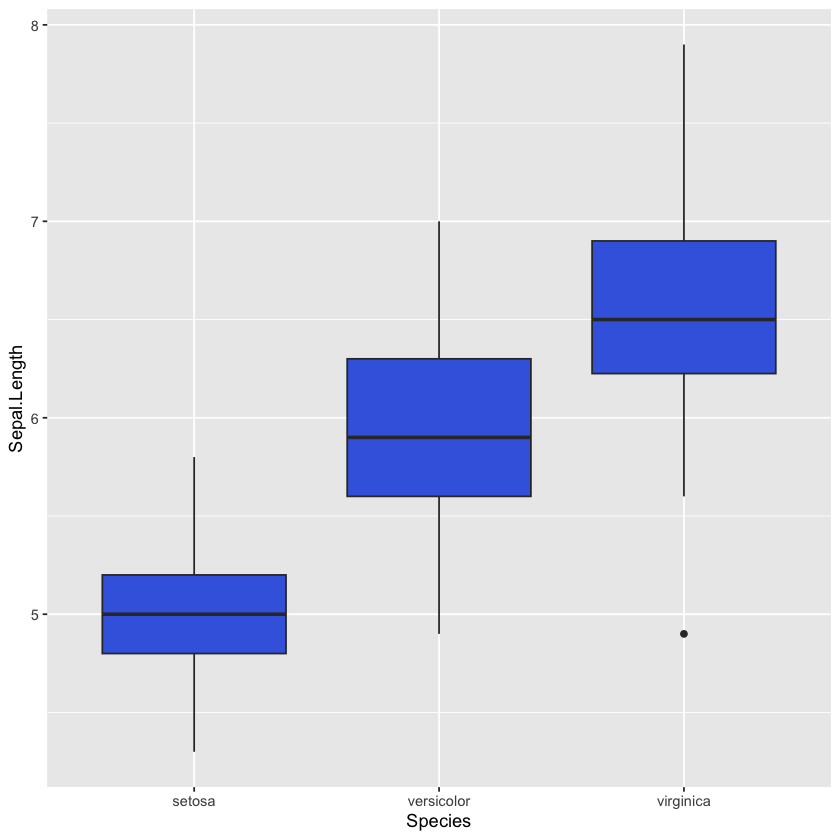

In [20]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(fill = "royalblue")

When fill or any aesthetic value is provided in the `geom_[plotType]()` portion of the command, that will override any aesthetic values anywhere else in the command. So if we were to add the fill variable to our `ggplot()` using the `aes()` command as shown below, we still get the same plot shown above where all of the violins are colored "royalblue".

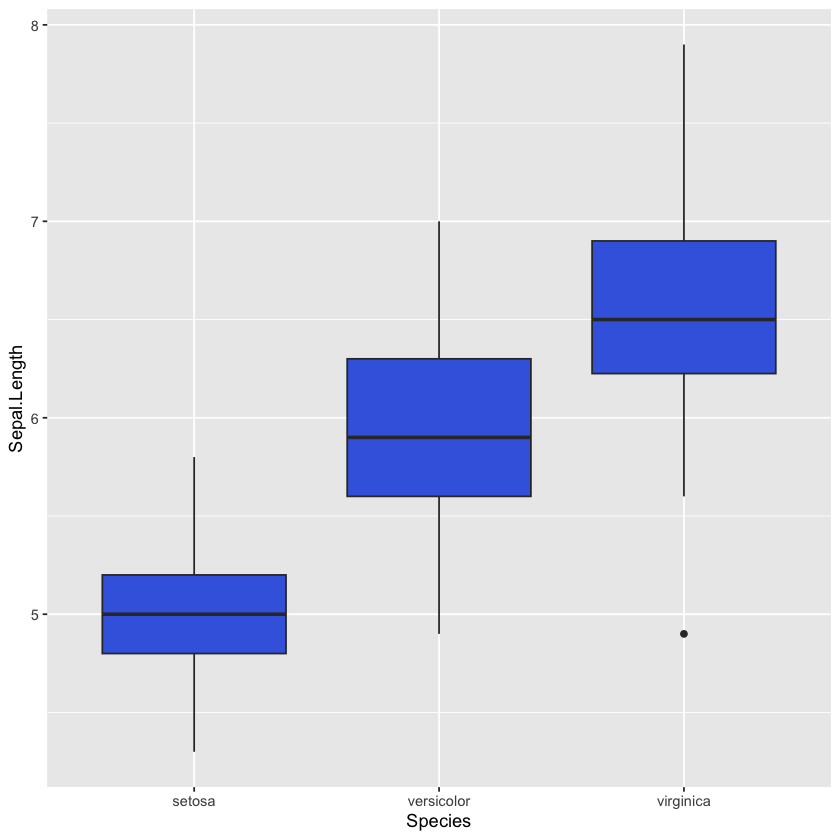

In [21]:
ggplot(iris, aes(Species,Sepal.Length, fill = Species)) + geom_boxplot(fill = "royalblue")

##### Multiple fill colors
Now, if we want to create a boxplot with fill color that changes by species we can code that one of two ways. We can either add `fill` to the `aes()` in the `ggplot()` section of the command, or we can add an `aes()` section to the `geom_boxplot()` portion of the command. Both will achieve the same result as shown by the two commands below. If we are building a graph with multiple data layers and potentially having to set two different fill variables in two different geoms, then setting the fill variable in the `geom_boxplot()` section is better.

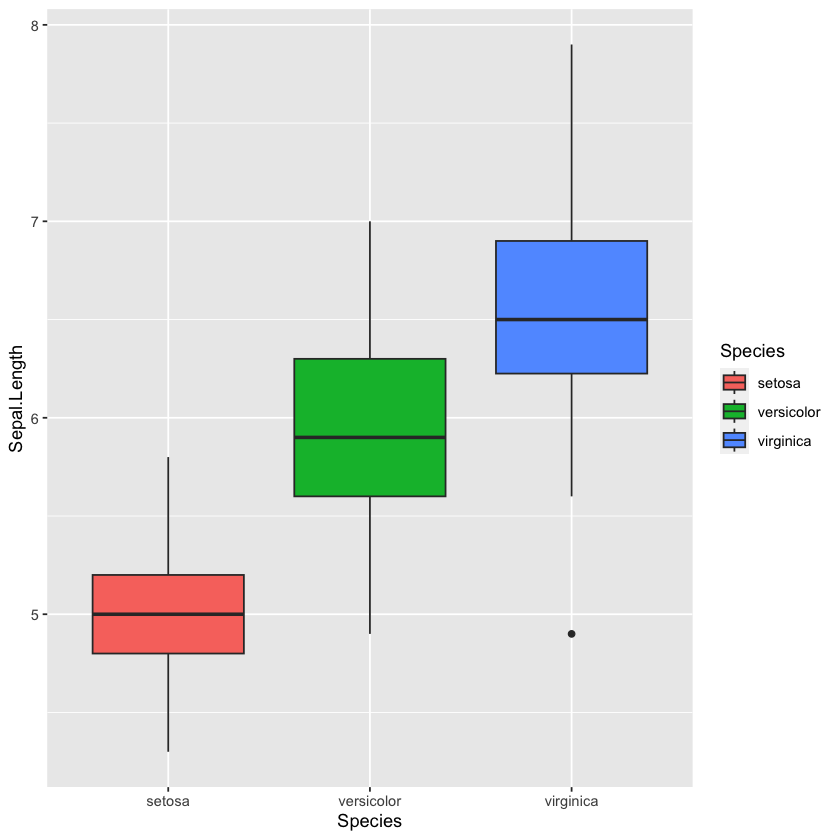

In [7]:
ggplot(iris, aes(Species,Sepal.Length, fill = Species)) + geom_boxplot()

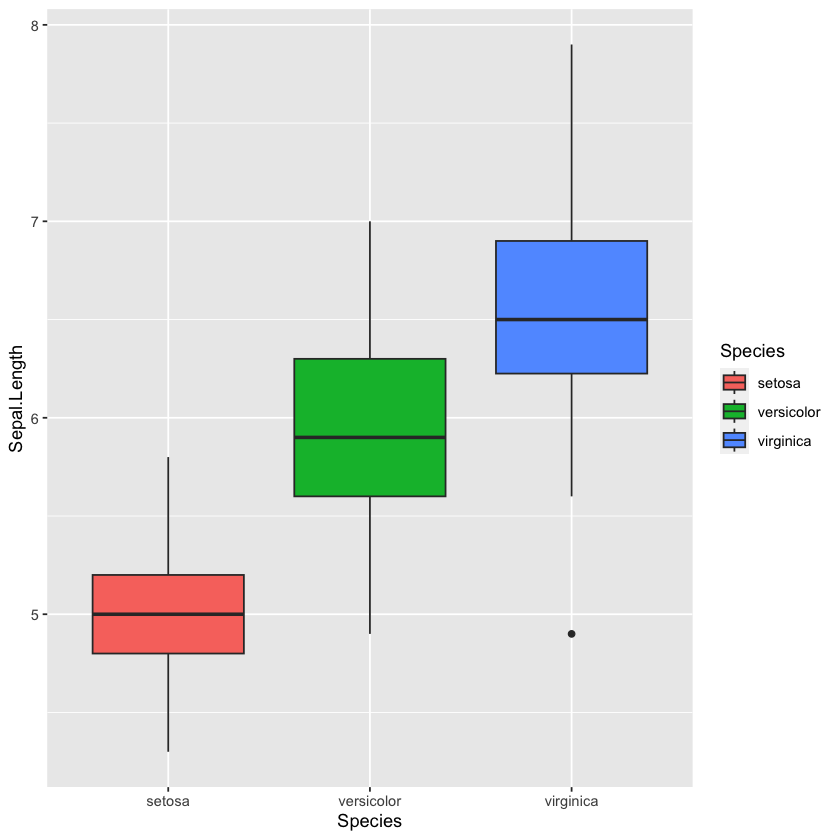

In [23]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species))

Now that we've set the fill to species, we can change the default fill colors to fill based on an existing palette or we can fill with custom colors. To fill using a palette we can use `scale_fill_brewer()` as shown in the command below. The R color brewer linked below has a number of premade palettes to choose from and is easy to use. The following commands show a few examples of different palettes available in this package.

https://r-graph-gallery.com/38-rcolorbrewers-palettes.html

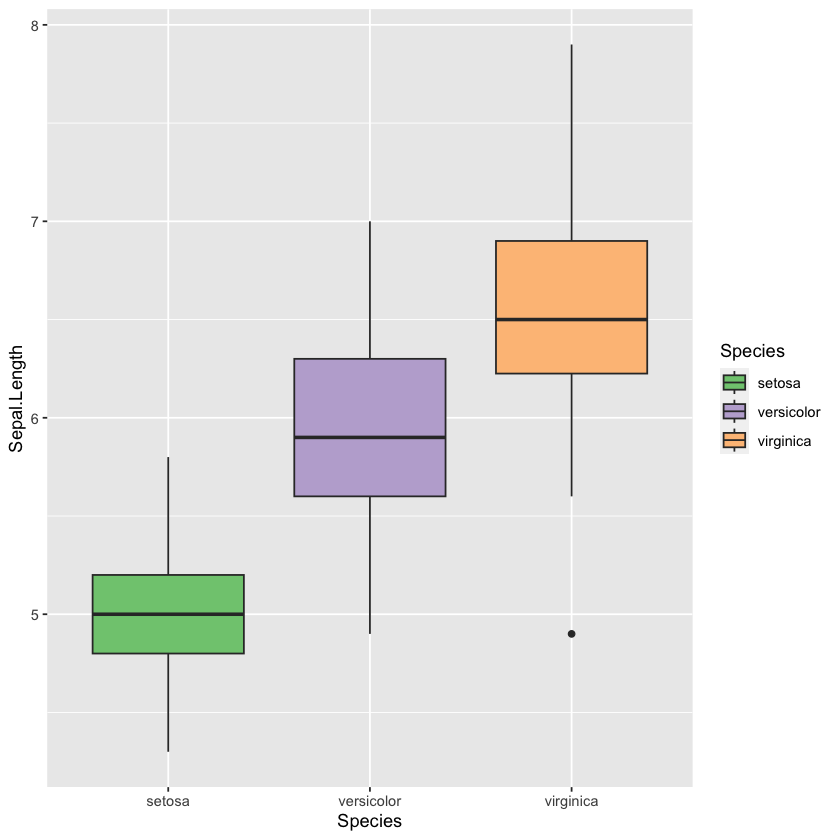

In [24]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species)) + scale_fill_brewer(palette = "Accent")

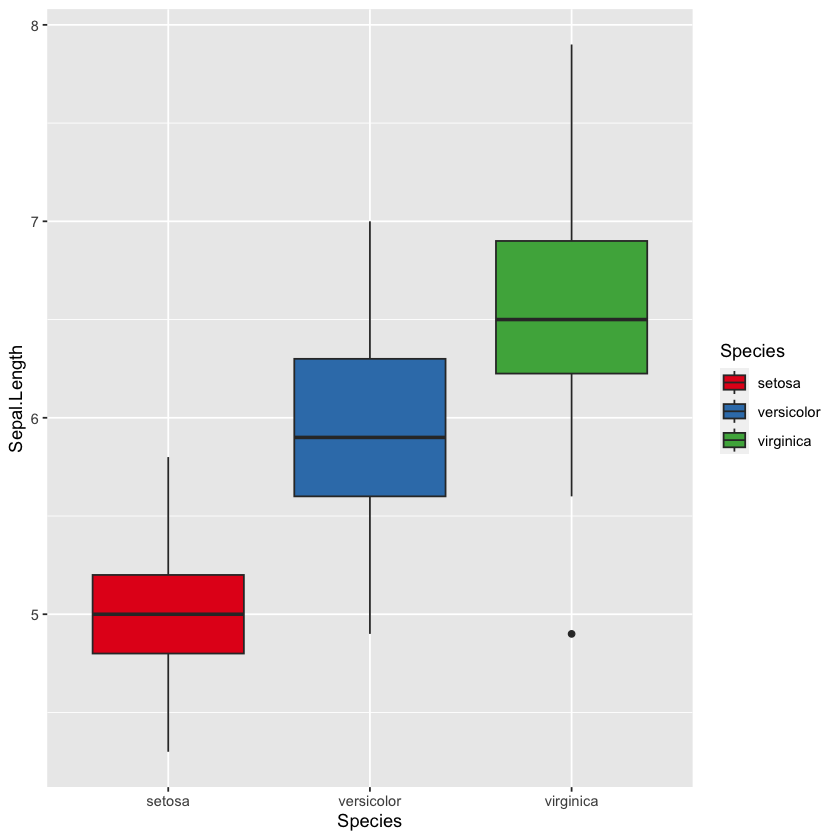

In [25]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species)) + scale_fill_brewer(palette = "Set1")

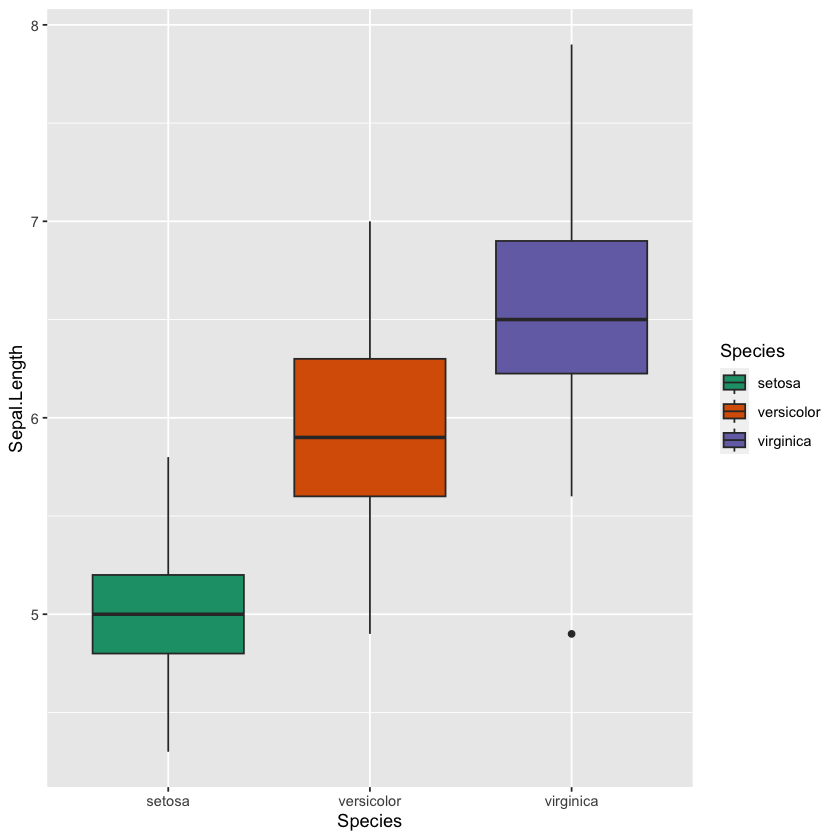

In [26]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species)) + scale_fill_brewer(palette = "Dark2")

To set custom fill colors we can substitute `scale_fill_brewer()` for `scale_fill_manual()` and designate the colors we want using `values =`. When using `values` we can either designate a list of colors to be assigned in the order the variable is plotted (first command) or we can specify which category in the variable is assigned to each color (second command).

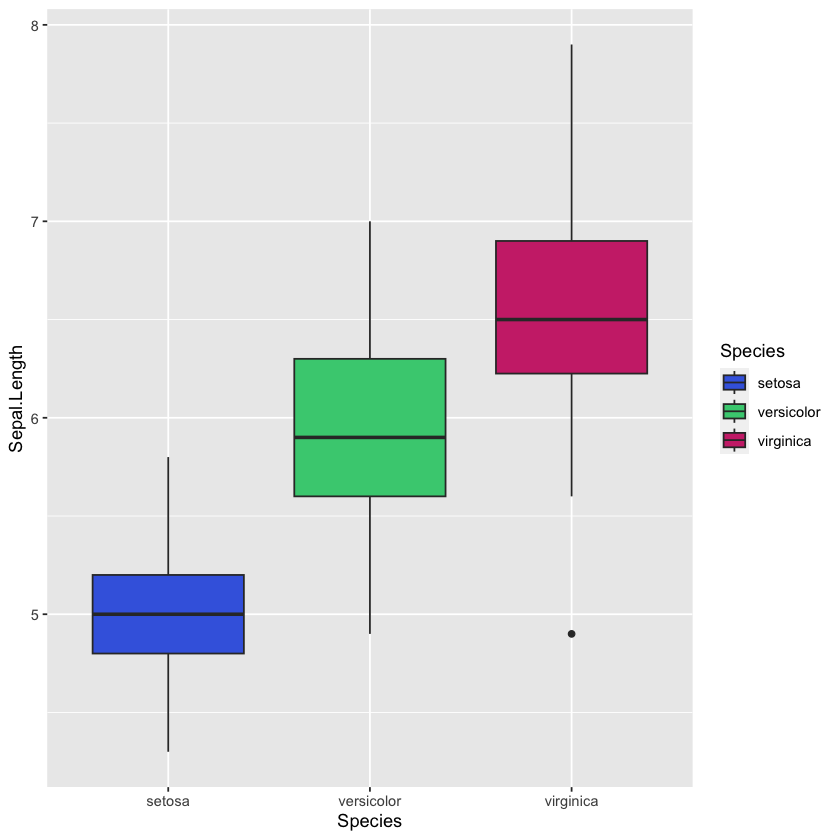

In [27]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species)) + 
scale_fill_manual(values = c("royalblue","seagreen3","violetred3"))

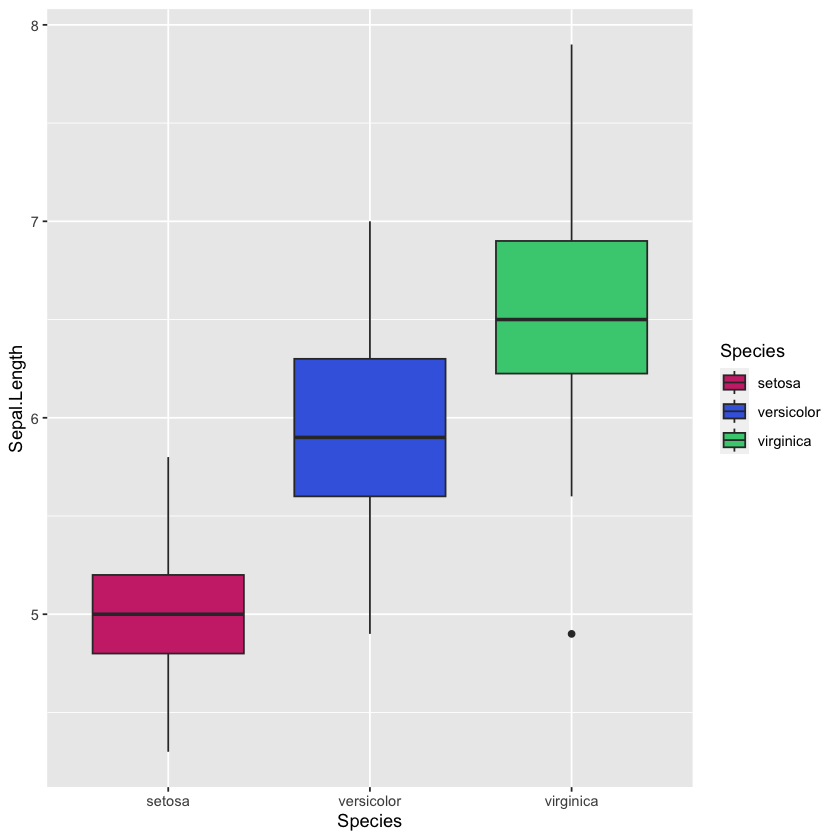

In [28]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species)) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3"))

##### Gradient fills
Gradient fills work the same as solid fill colors but for continuous data as opposed to categorical data. For these examples, we are going to make a scatter plot of sepal length by sepal width. We do this by changing our x and y to Sepal.Length and Sepal.Width and then changing our geom to `geom_point()` instead of `geom_boxplot()`. The only other change is to add `pch = 21` in the `geom_point()` part of the command, which changes the shape of the point to be a circle with a fill color. We will go over that more in the shape section of aesthetics. When we run the command below, we get a plot with scattered points colored by species.

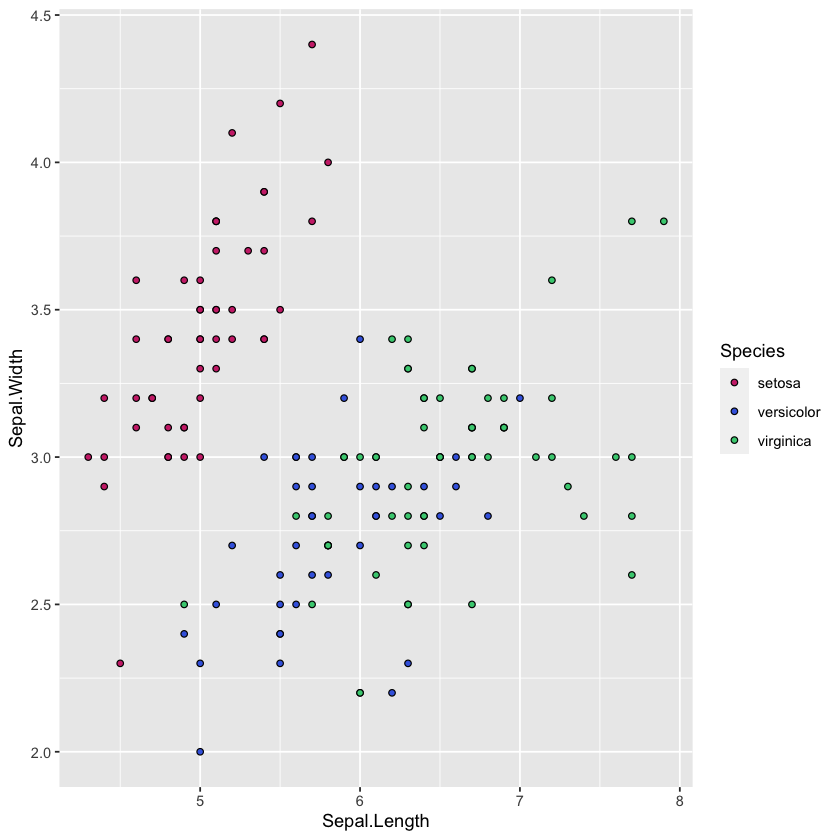

In [50]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species), pch = 21) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3"))

Now in this plot we are going to change the fill color to a gradient fill using `scale_fill_gradient()` to set a custom gradient to fill points by a numeric variable, in this case `Sepal.Length`.

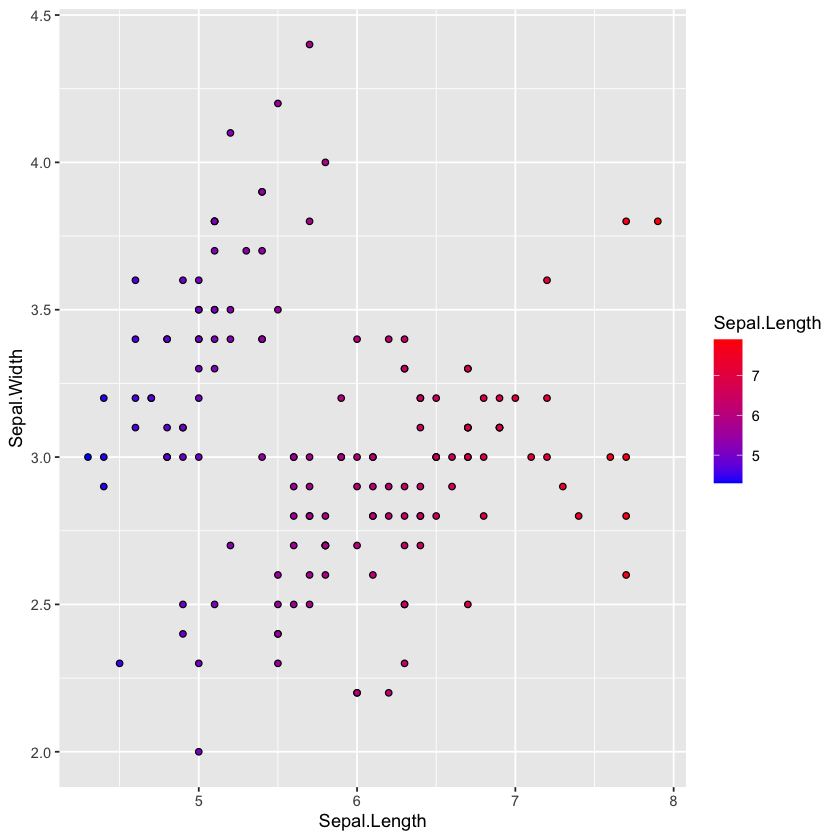

In [4]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21) + 
scale_fill_gradient(high = "red", low = "blue")

We can also use `scale_fill_gradient2()` to set a custom gradient with 3 colors as opposed to two.

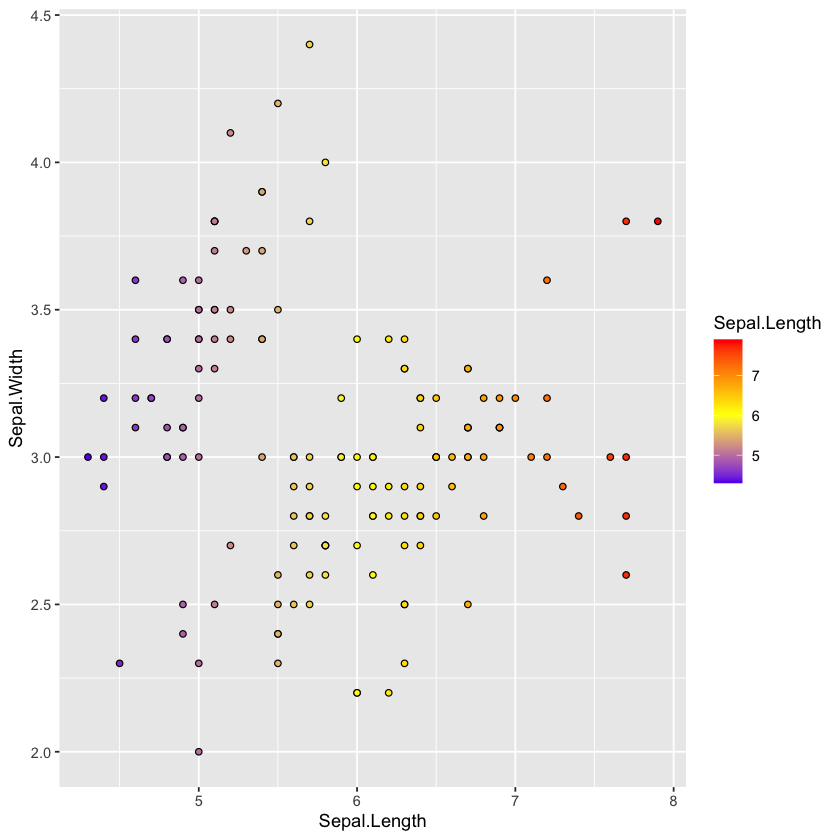

In [6]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21) + 
scale_fill_gradient2(high = "red", mid= "yellow", low = "blue", midpoint = 6)

The package `viridis` allows you to set gradient fills with a number of preset options. The website displaying each of these options is linked below.

https://search.r-project.org/CRAN/refmans/viridisLite/html/viridis.html

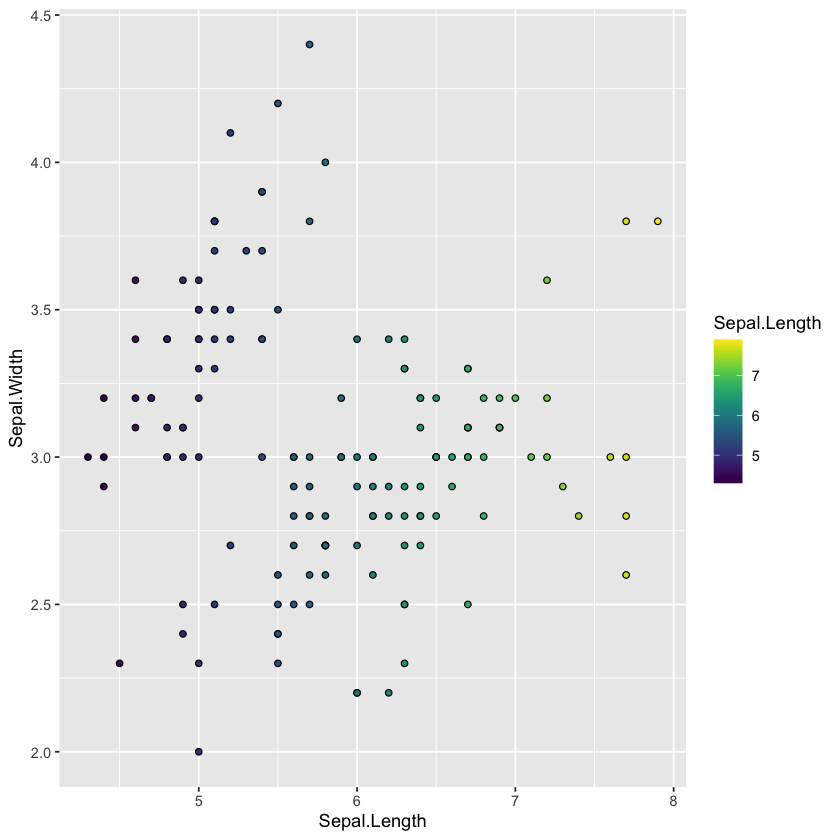

In [21]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21) + 
scale_fill_viridis()

The `option` input allows us to change the gradient preset as shown in the next commands.

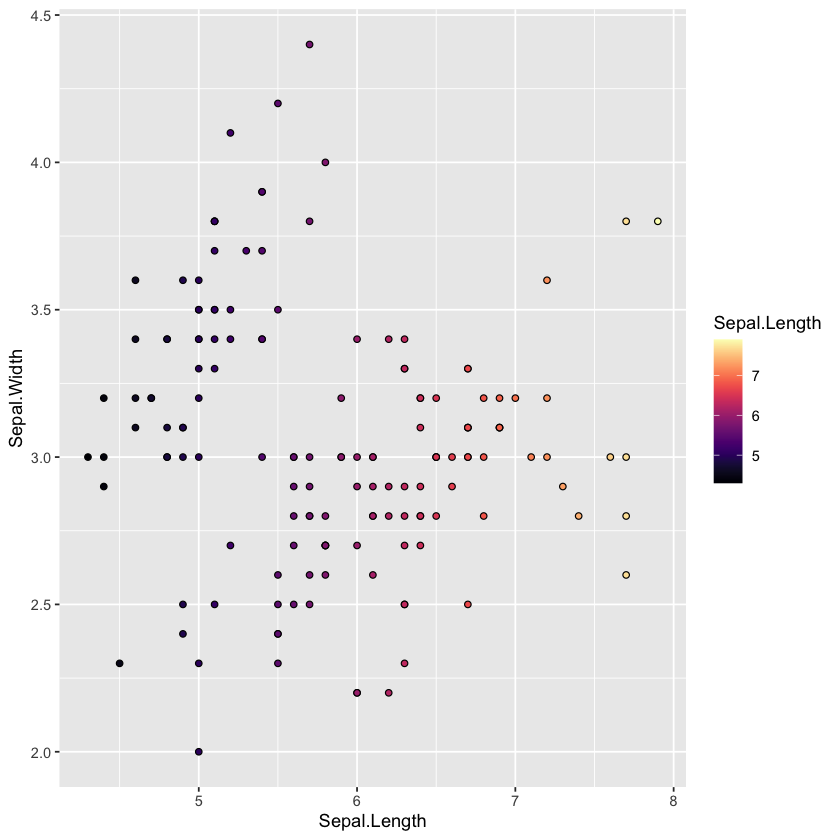

In [22]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21) + 
scale_fill_viridis(option = "A")

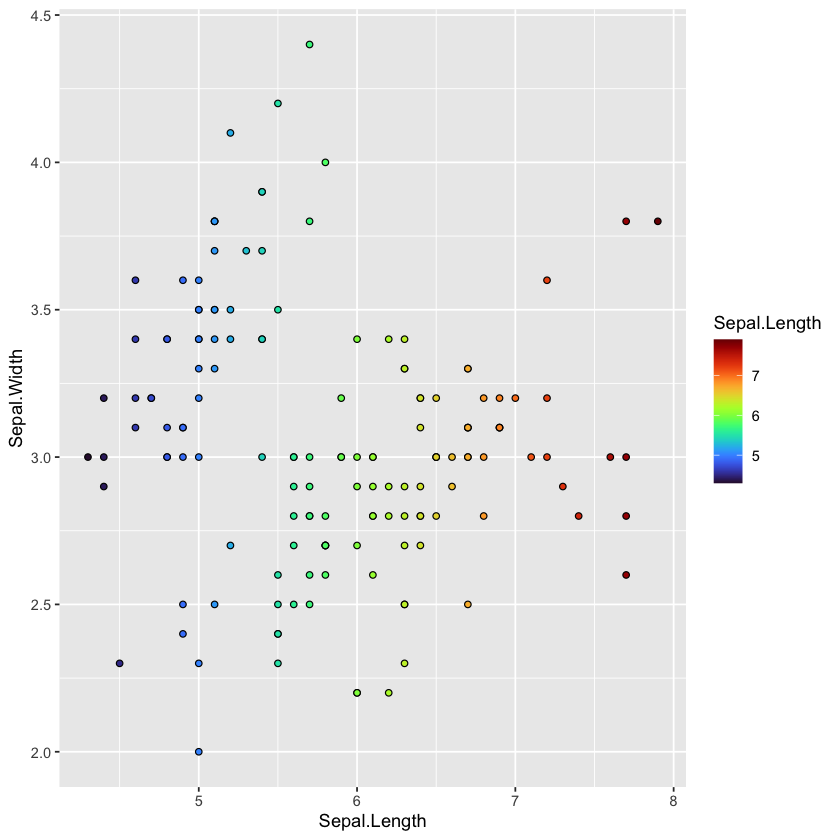

In [29]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21) + 
scale_fill_viridis(option = "H")

<a id="4"></a>
#### 2.2 Color
Color operated very similar to fill, but instead of changing the interior color of an object it will change the outline color. This can be confusing with points because some point shapes will have a fill and an outline while others will have just a line color. Below are the same commands as in the fill section but with the fill variable substituted for color to change the outline color of the boxplots.

##### One line color
The following command generates the same boxplot as above but with the boxes outlined in "royalblue". 

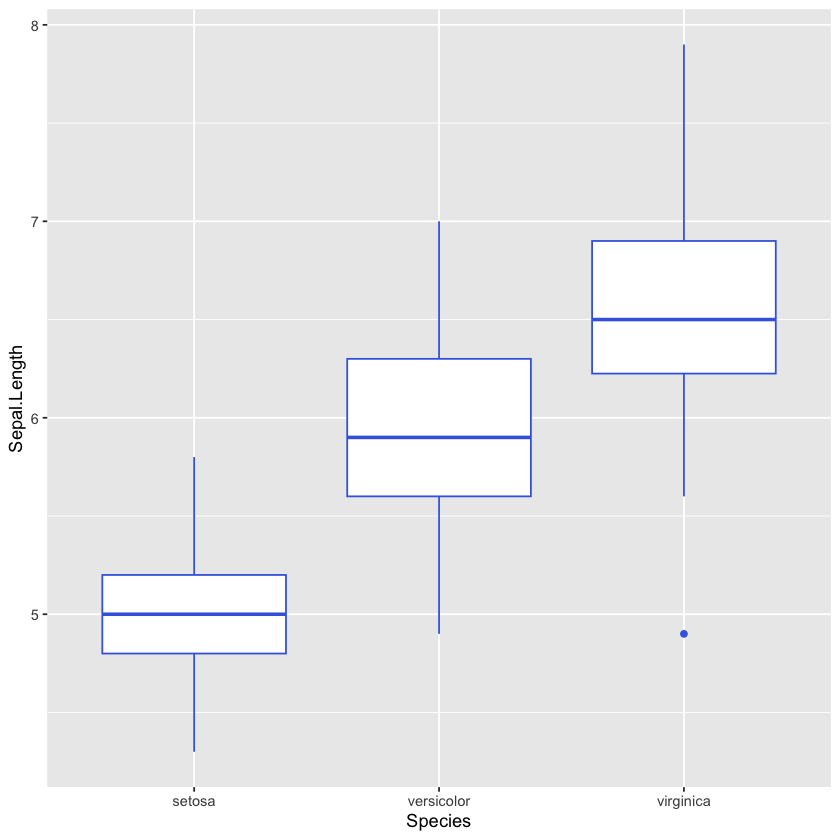

In [29]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(color = "royalblue")

##### Multiple line colors
In the following commands, the line color is coded to change by species first in the `ggplot()` `aes()` options and second in the `geom_boxplot()` `aes()` options. Both commands achieve the same result as shown below.

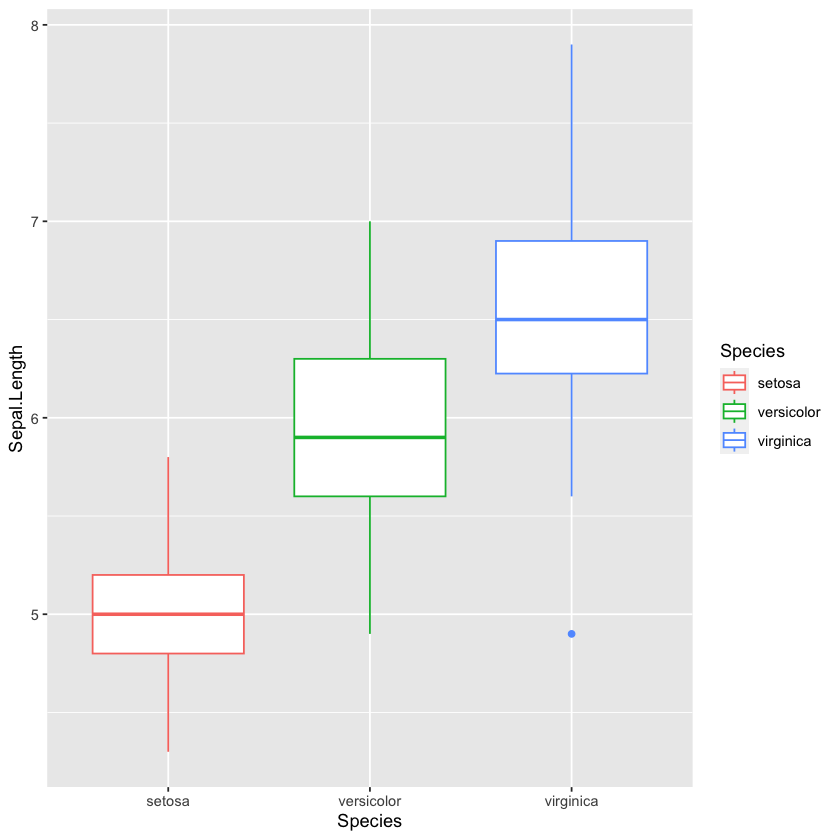

In [30]:
ggplot(iris, aes(Species,Sepal.Length, color = Species)) + geom_boxplot()

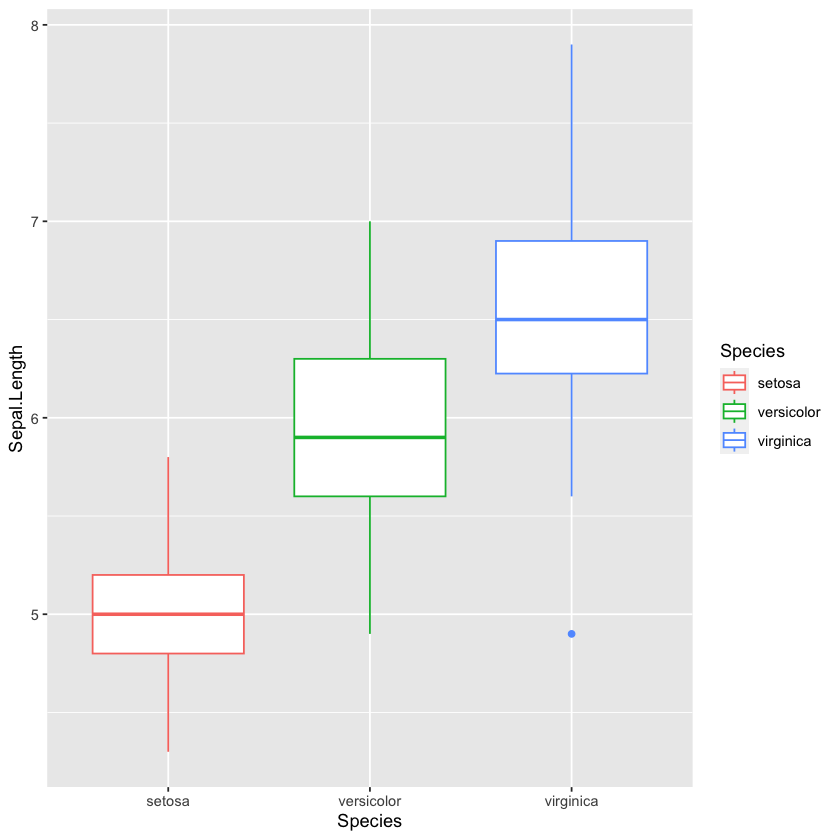

In [31]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(color = Species))

We can also set custom line colors using `scale_color_brewer()` and `scale_color_manual()` as we did above with our fill variable. The following commands show first using a couple examples of preset brewer palettes and then examples of using `scale_color_manual()` to set custom line colors with and without category assignments.

https://r-graph-gallery.com/38-rcolorbrewers-palettes.html

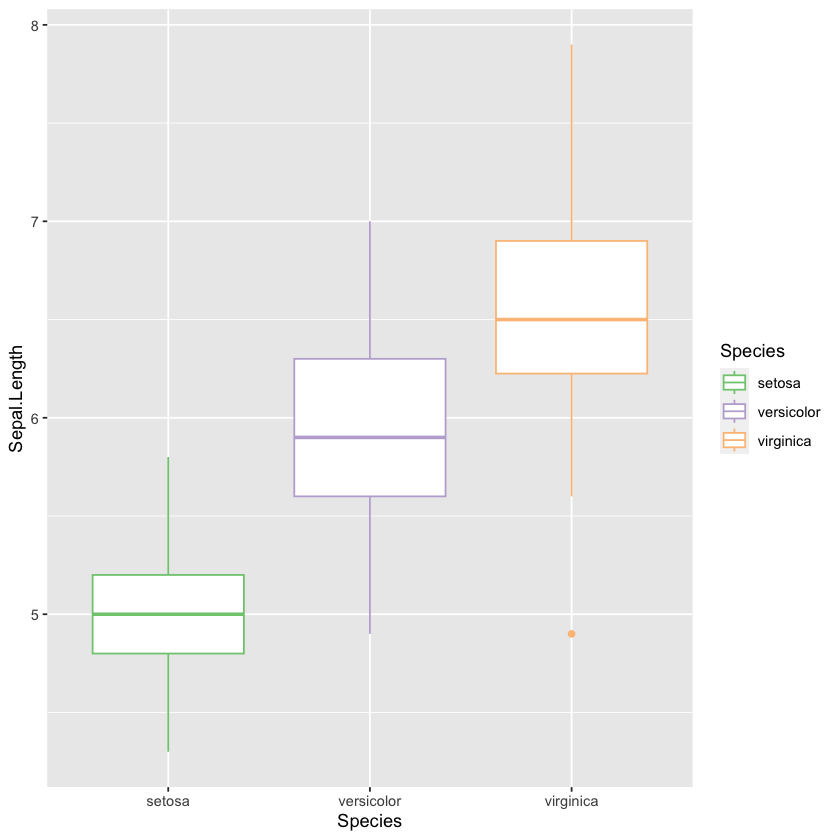

In [33]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(color = Species)) + scale_color_brewer(palette = "Accent")

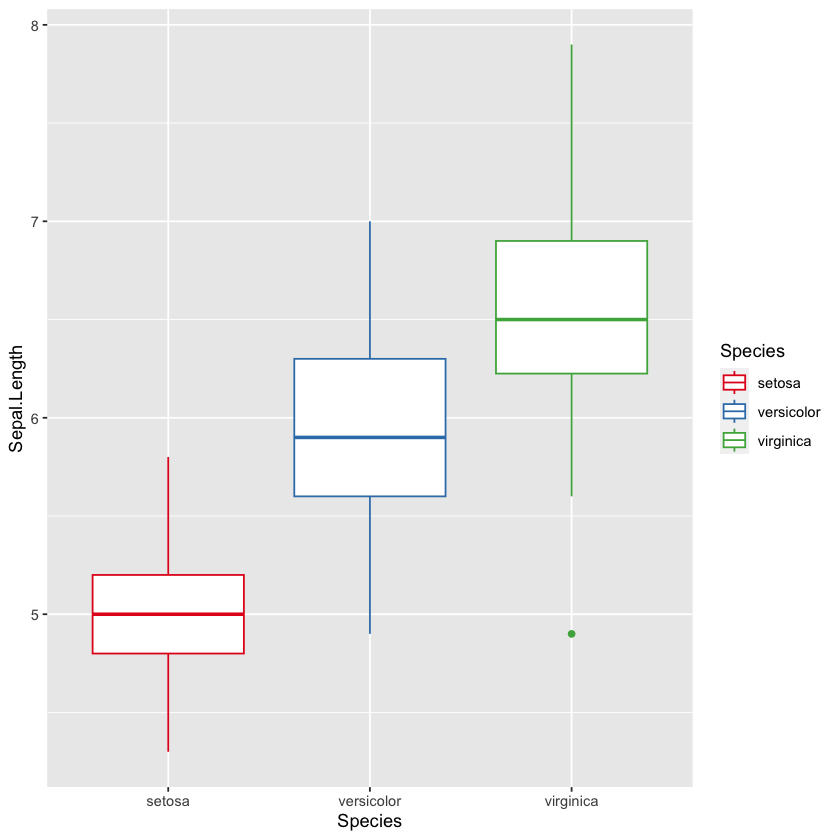

In [34]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(color = Species)) + scale_color_brewer(palette = "Set1")

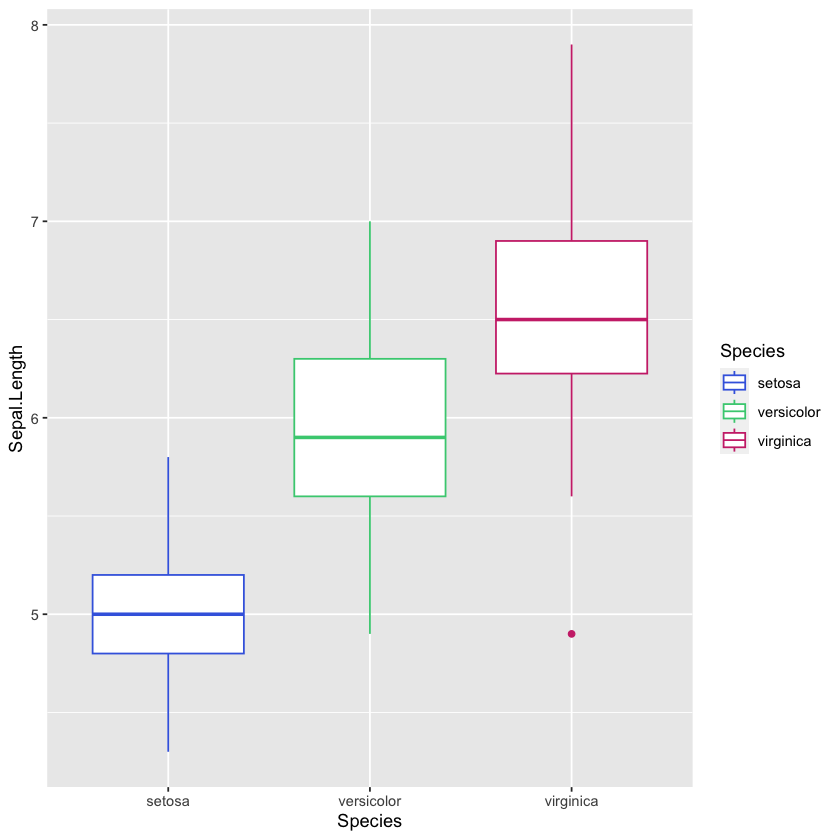

In [35]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(color = Species)) + 
scale_color_manual(values = c("royalblue","seagreen3","violetred3"))

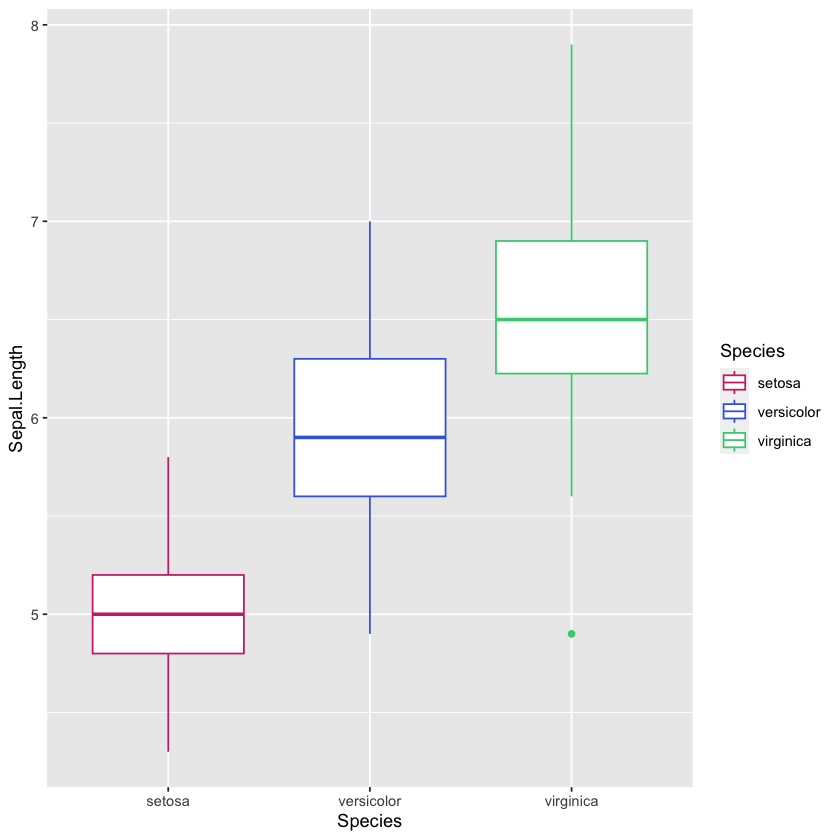

In [36]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(color = Species)) + 
scale_color_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3"))

Just as with the fill section above, we implement a gradient color scale for points without a fill color using `scale_color_gradient()` and `scale_color_viridis()`. The following commands are the same commands as in the fill section for implementing gradients but this time using color.

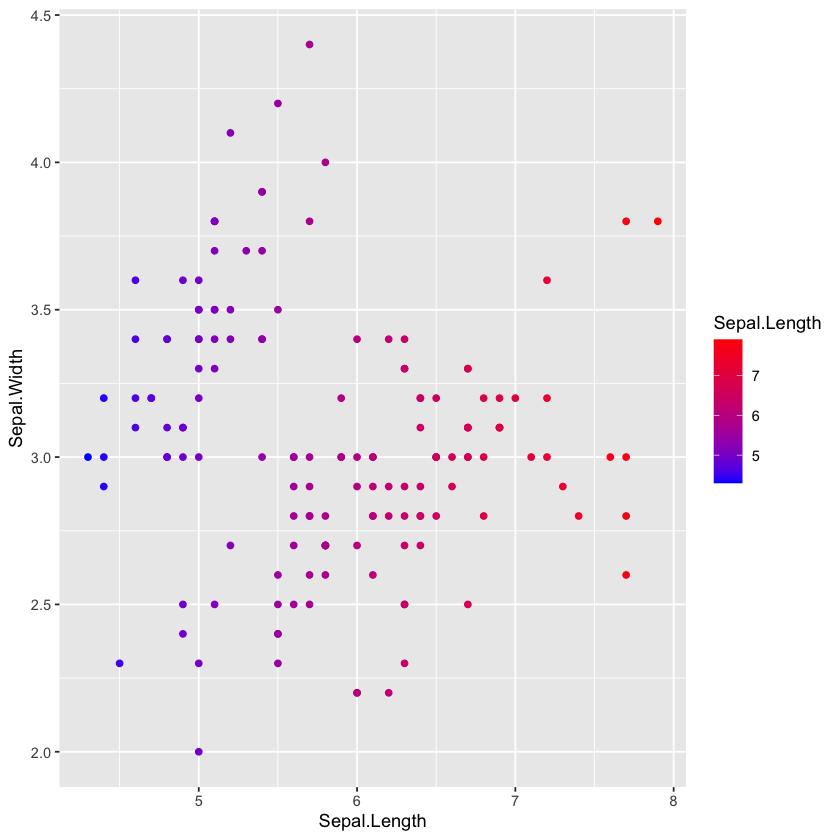

In [36]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(color = Sepal.Length)) + 
scale_color_gradient(high = "red", low = "blue")

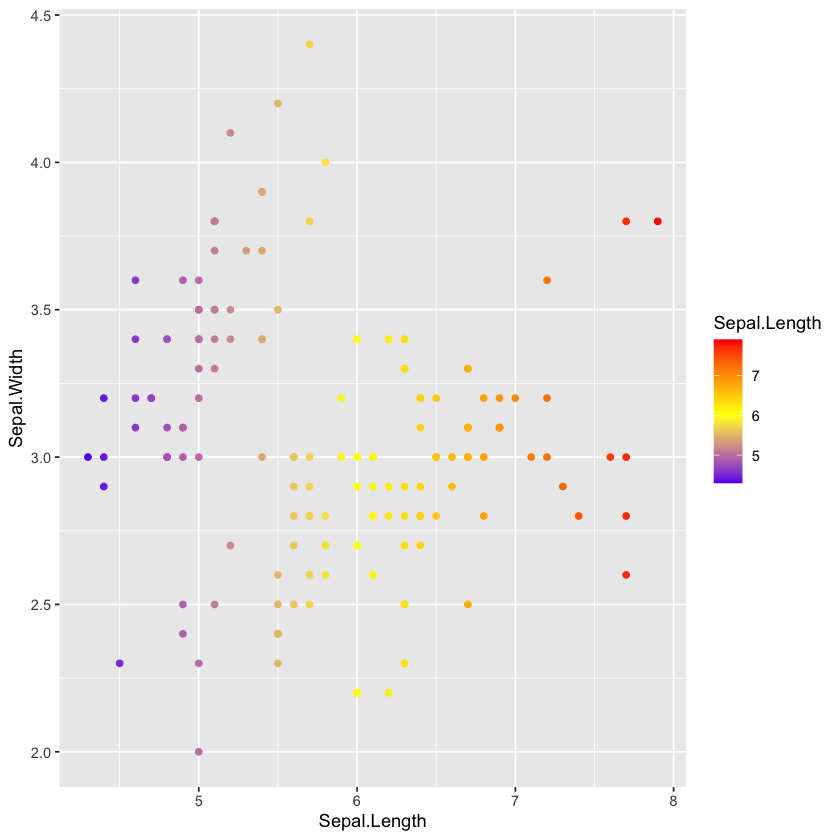

In [38]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(color = Sepal.Length)) + 
scale_color_gradient2(high = "red", mid = "yellow", low = "blue", midpoint = 6)

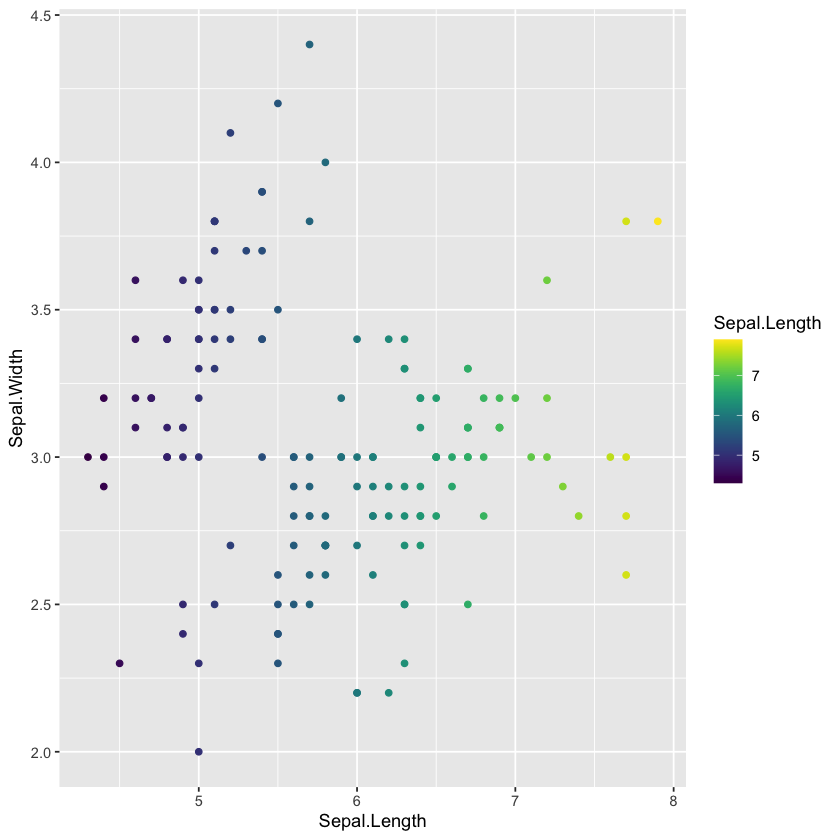

In [39]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(color = Sepal.Length)) + 
scale_color_viridis()

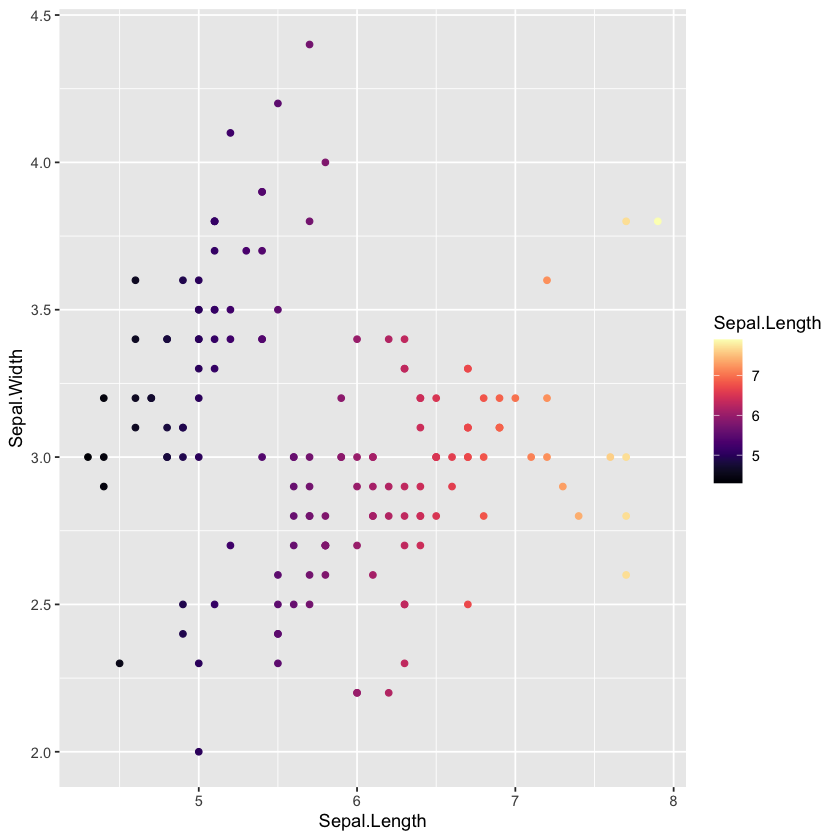

In [40]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(color = Sepal.Length)) + 
scale_color_viridis(option = "A")

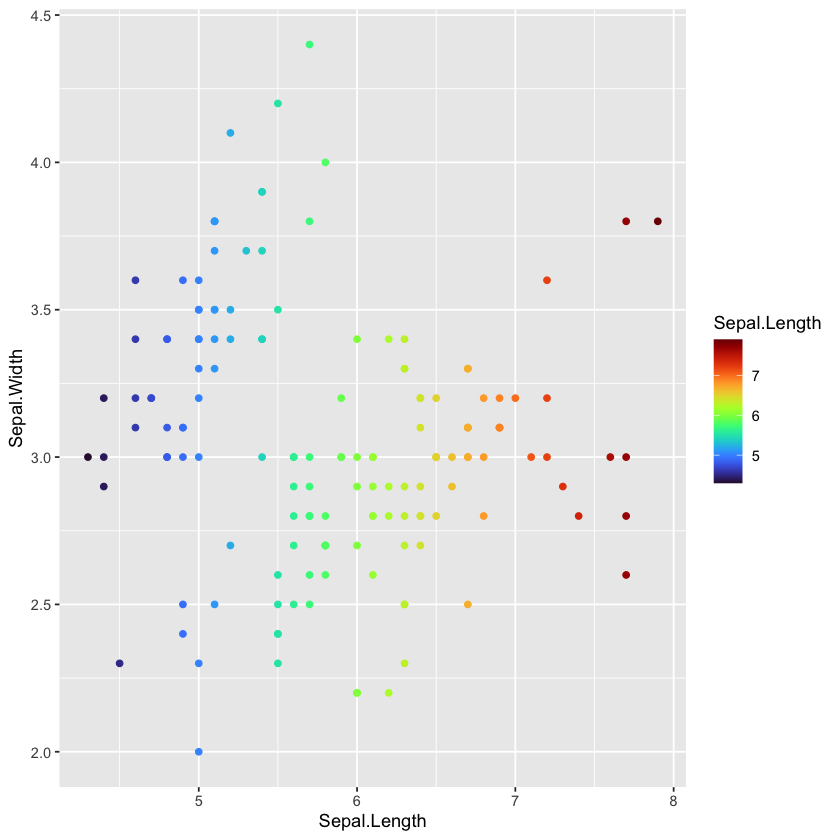

In [42]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(color = Sepal.Length)) + 
scale_color_viridis(option = "H")

<a id="5"></a>
#### 2.3 Shape
Shape refers to the shape of a point. This variable can be good for designating categories in a scatter plot or ordination. We can either designate one shape for all points just as we did for fill colors or designate shapes based on a categorical variable. The option we use to assign shape is `pch`. 

The first command below shows how to set the shape for all points in the plot first as circles with outline and fill and the second as triangles with oultine and fill. I have also included a link to a summary of the shape options for ggplot.

http://www.sthda.com/english/wiki/ggplot2-point-shapes

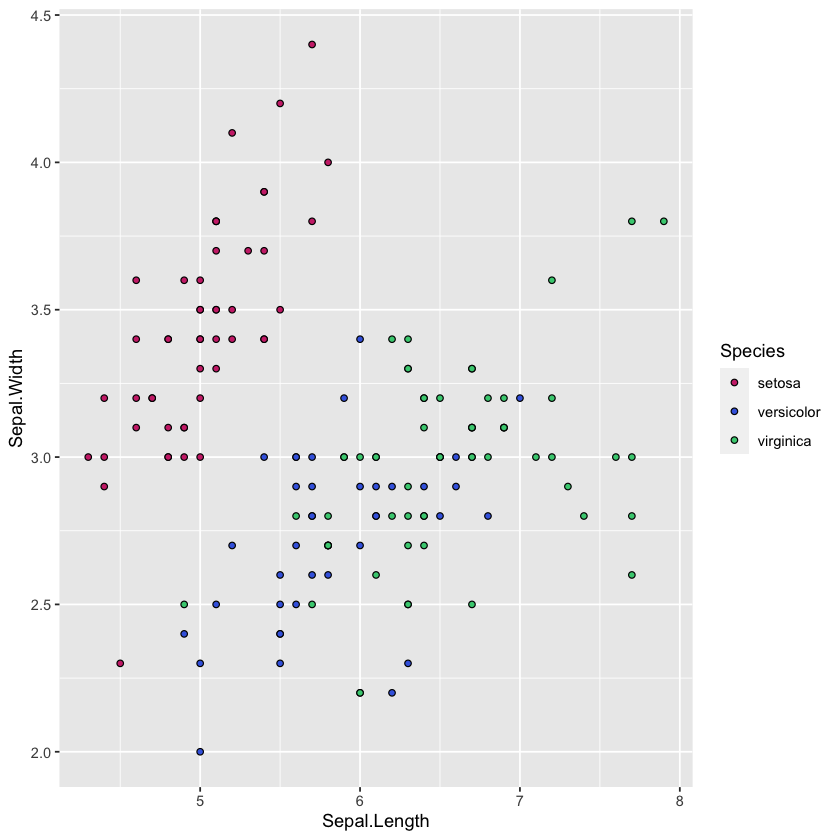

In [30]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species), pch = 21) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3"))

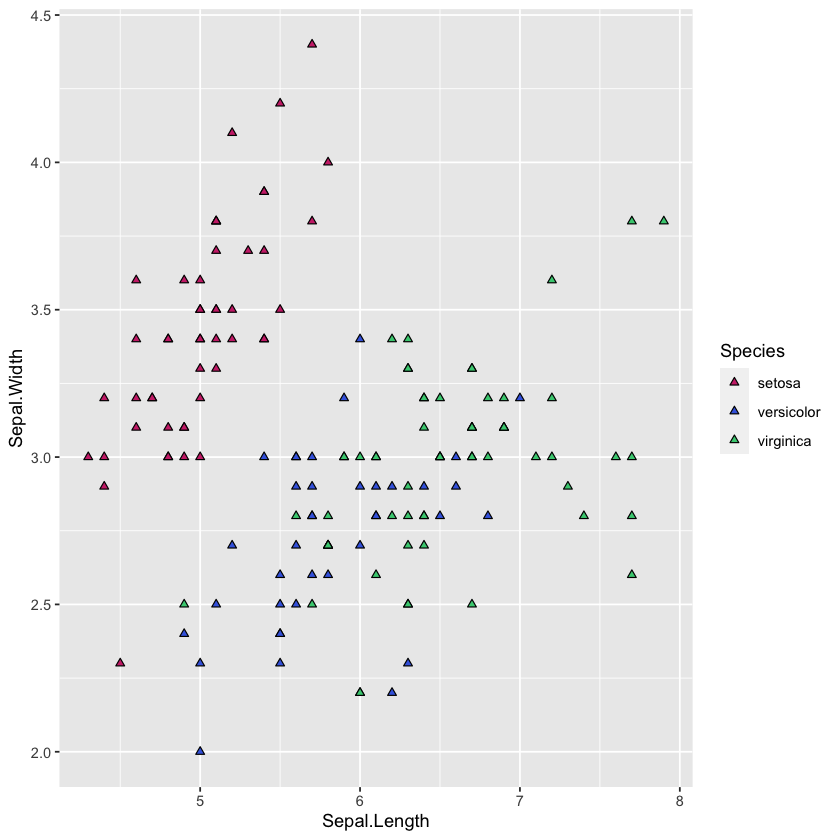

In [33]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species), pch = 24) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3"))

The next set of commands shows you how to first set shapes to assign to a categorical variable (Species) in the order the items appear in the data frame and the second command assigns specific species to specific shapes.

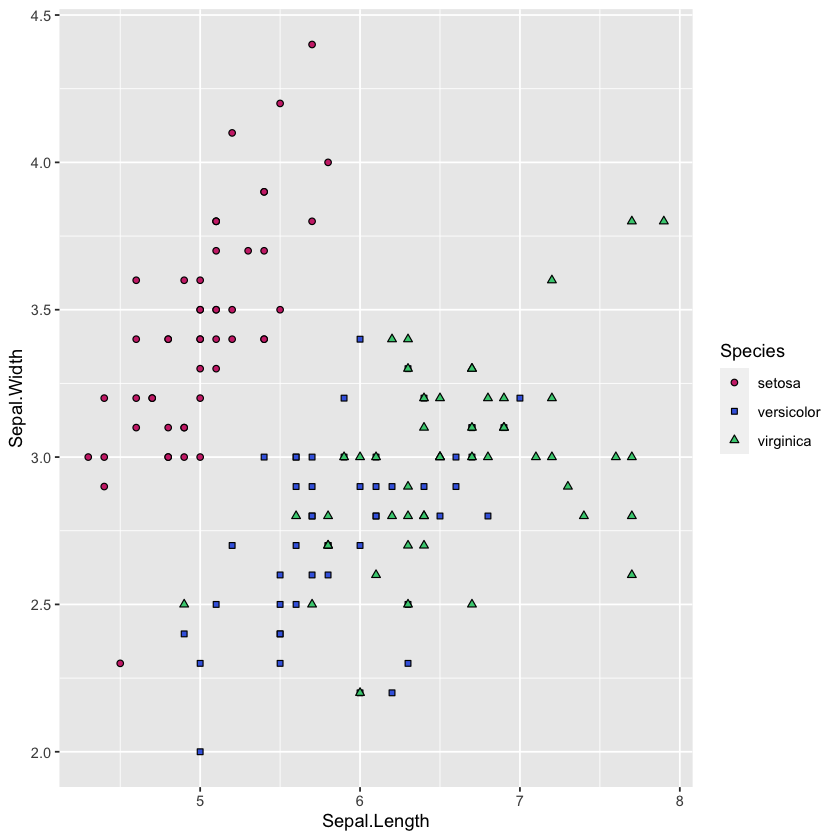

In [34]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species)) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c(21,22,24))

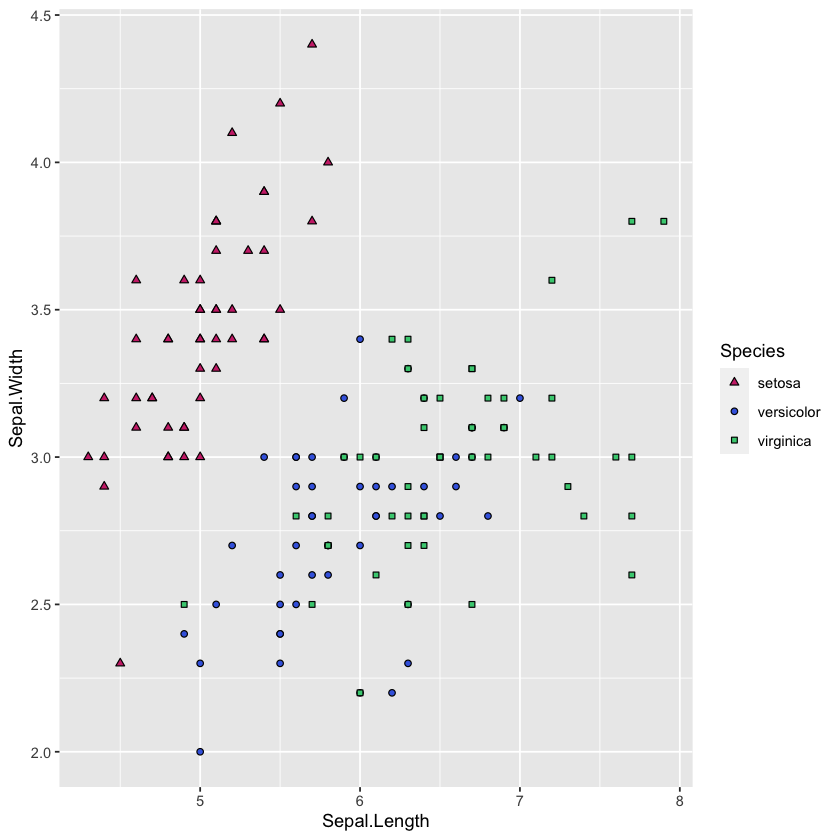

In [35]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species)) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24))

<a id="6"></a>
#### 2.4 Size
Size can be used to set a designated size for points in a graph or can be scaled to a continuous variable. The first command here shows how to designate a single size for all points in a plot. Because we are setting the size for all points in the plot we designate it within `geom_point()` but outside of the `aes()` section of the command.

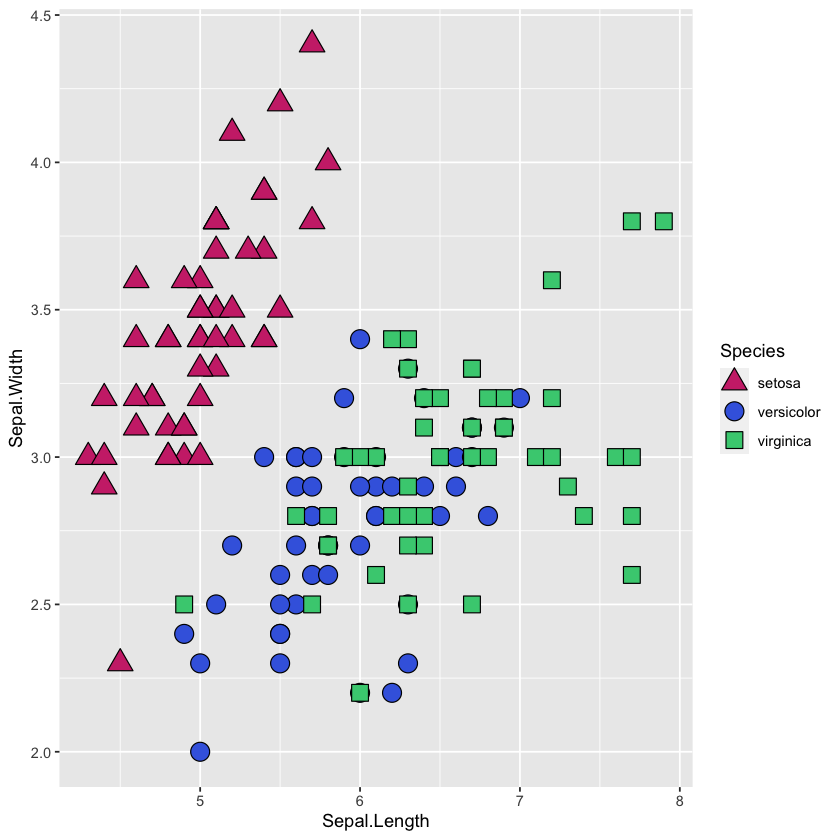

In [44]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24))

These next commands implement size within the `aes()` section of `geom_point()` to scale the size of the points by the variable `Sepal.Width`. The command below uses both size and a color gradient to show how you can scale two different continuous variables in a dataset within one plot.

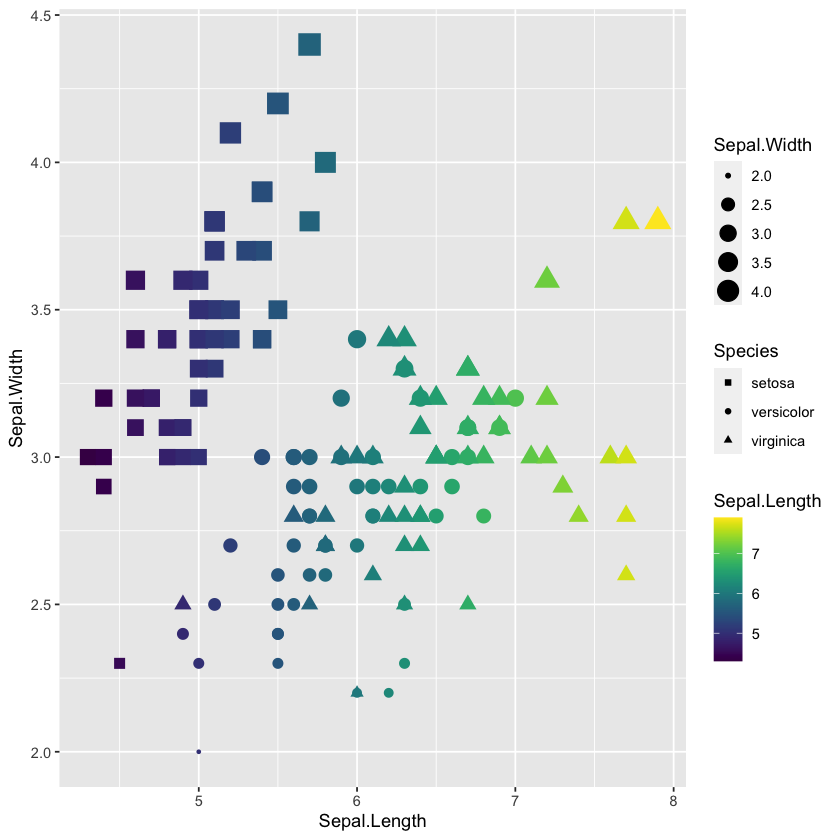

In [47]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(color = Sepal.Length, size = Sepal.Width, shape = Species)) + 
scale_color_viridis() + scale_shape_manual(values = c(15,16,17))

<a id="7"></a>
#### 2.5 Alpha
Another variable that can be scaled continuously is the opacity of shapes in the graph which in ggplot is referred to as alpha. Alpha is scaled between 0 and 1, with 0 being completely transparent and 1 being completely opaque. The next two commands show first how to set the opacity of a scatterplot to 50% and second how to scale alpha with a continuous variable.

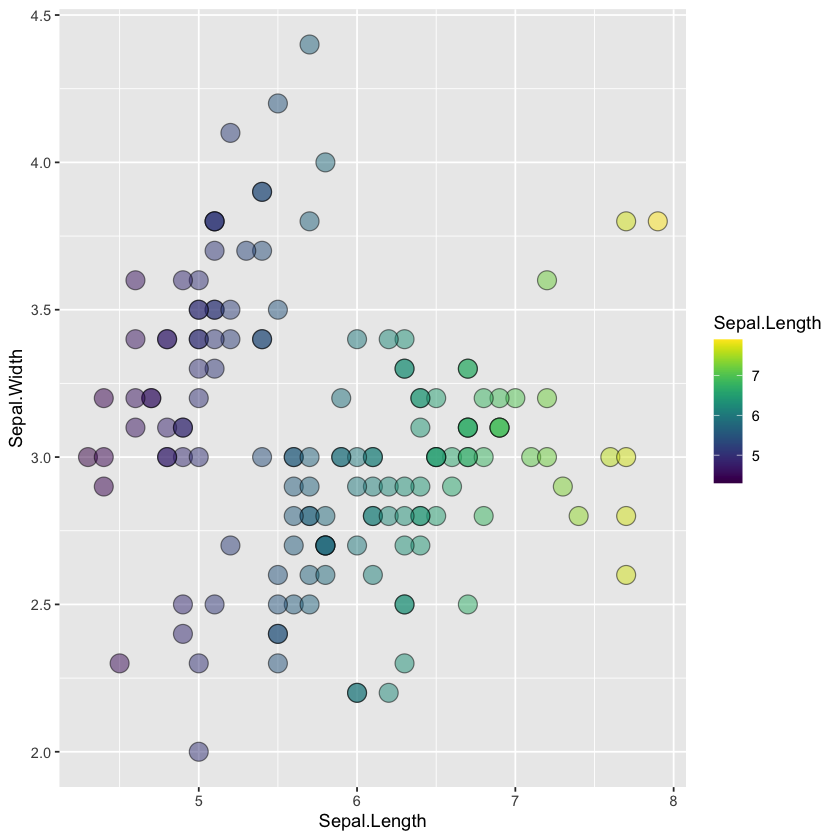

In [48]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21, size = 5, alpha = 0.5) + 
scale_fill_viridis()

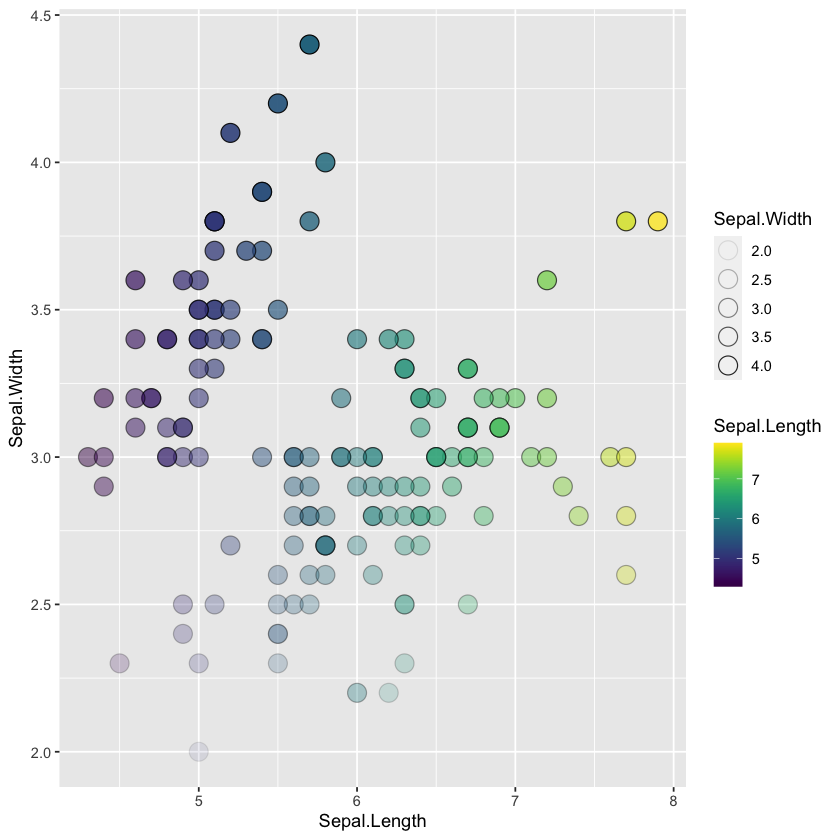

In [49]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length, alpha = Sepal.Width), pch = 21, size = 5) + 
scale_fill_viridis()

<a id="8"></a>
### 3. Faceting plots
Faceting plots is a good way to separating data by a categorical variable to better visualize trends within groups. There are two ways to facet plots in ggplot, `facet_grid()` and `facet_wrap()`. `facet_grid()` allows you to orient your groups by up to two variables in a grid format. In other words, if you provide one variable `facet_grid()` will align the plots side by side in a single row and if you provide two variables it will orient your plots in a grid with the two variables orienting the grid along the x and y axes. On the other hand, `facet_wrap()` allows you to separate your plot by a single variable. The plots will then be aligned in a grid format based on the number of categories within the provided variable.

<a id="9"></a>
#### 3.1  `facet_grid()`
In the following commands we will plot the same scatter plots as used above but facet them by species. In this particular case, we are only going to provide one variable to the `facet_grid()` command. The general format for the `facet_grid()` command is `facet_grid(y~x)` where x and y are variables in which you orient the plots along each of those axes.

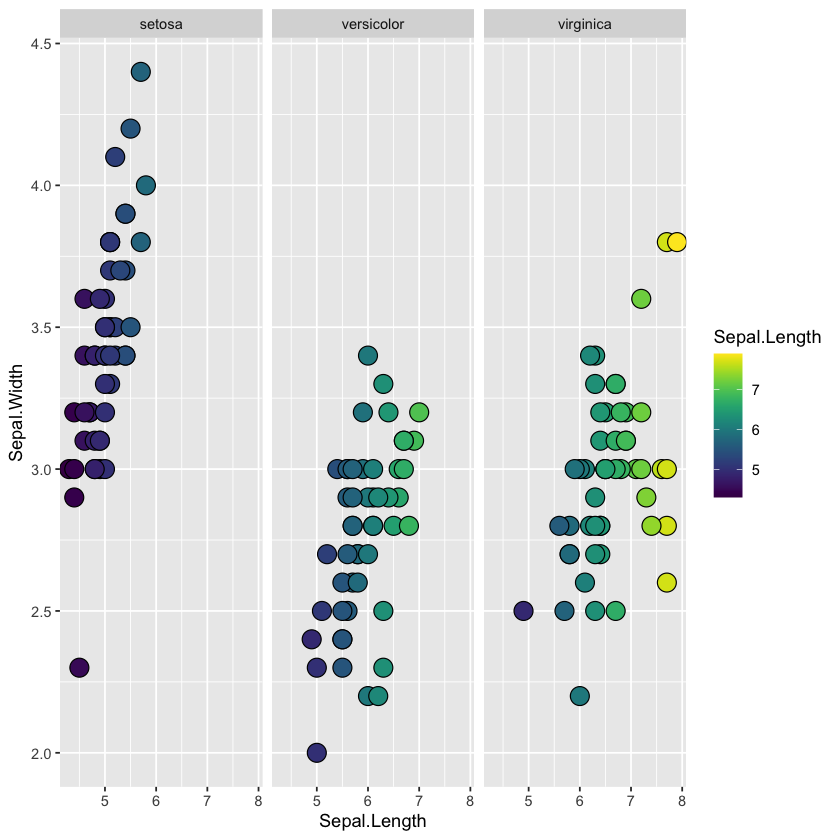

In [52]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21, size = 5) + 
scale_fill_viridis() + facet_grid(~Species)

If you want axes scales to automatically adjust to the data points provided in each individual plot and not use one scale for the entire plot you can use `scales = "free"` within the `facet_grid()` command as shown below.

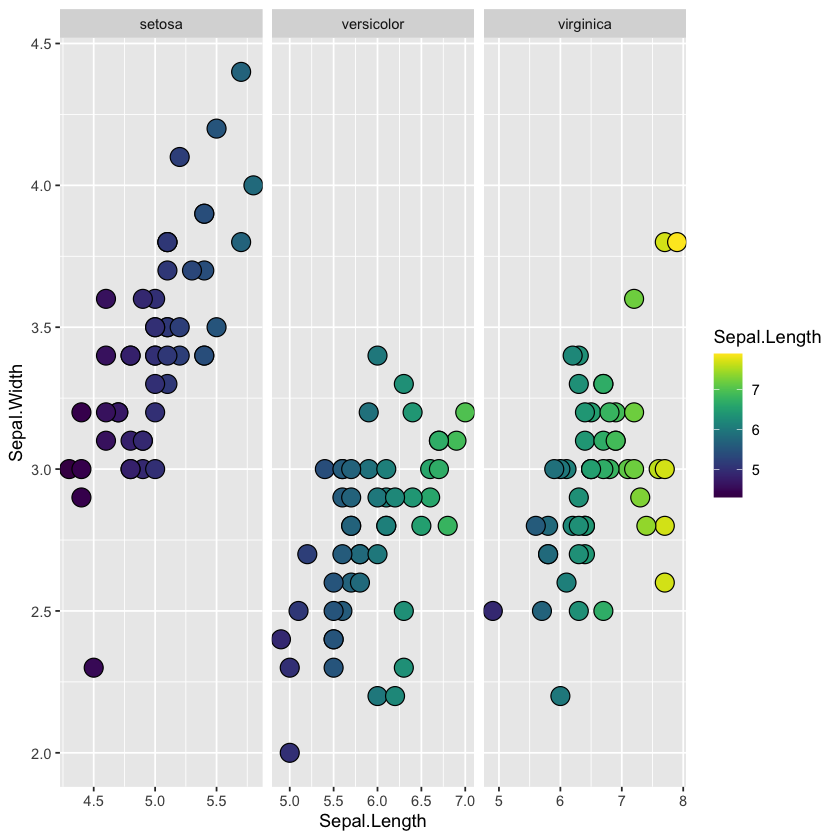

In [61]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21, size = 5) + 
scale_fill_viridis() + facet_grid(~Species, scales = "free")

<a id="10"></a>
#### 3.1  `facet_wrap()`
An alternative to `facet_grid()` that works well when you want to arrange plots by a single variable with a lot of categories is `facet_wrap()`. `facet_wrap()` works almost exactly the same as `facet_grid()` but since the input is only one variable the structure of the command is `facet_wrap(~variable, nrow = [integer], ncol = [integer])`. The `nrow` and `ncol` options are optional but allow you to control the dimensions of your ouput. By omitting them the computer will automatically decide on dimensions. The following two commands use `facet_wrap()` to show the same as the above commands with `facet_grid()` with a slightly different layout.

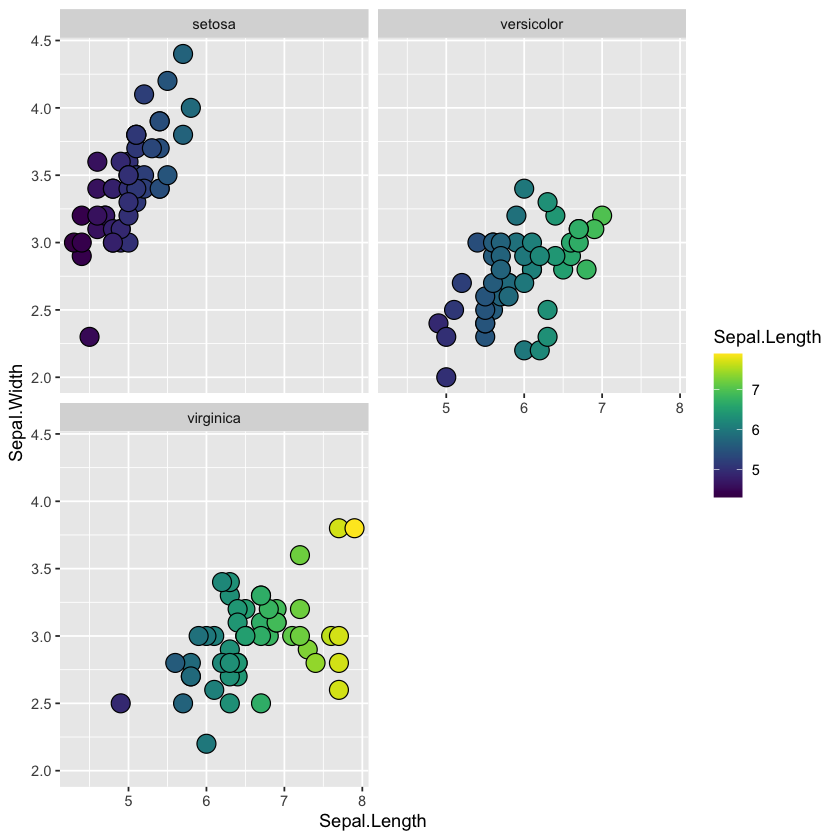

In [63]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21, size = 5) + 
scale_fill_viridis() + facet_wrap(~Species, nrow = 2, ncol = 2)

Just as with `facet_grid()` we can again use `scales = "free"` with `facet_wrap()` to adjust axes scales within our plots.

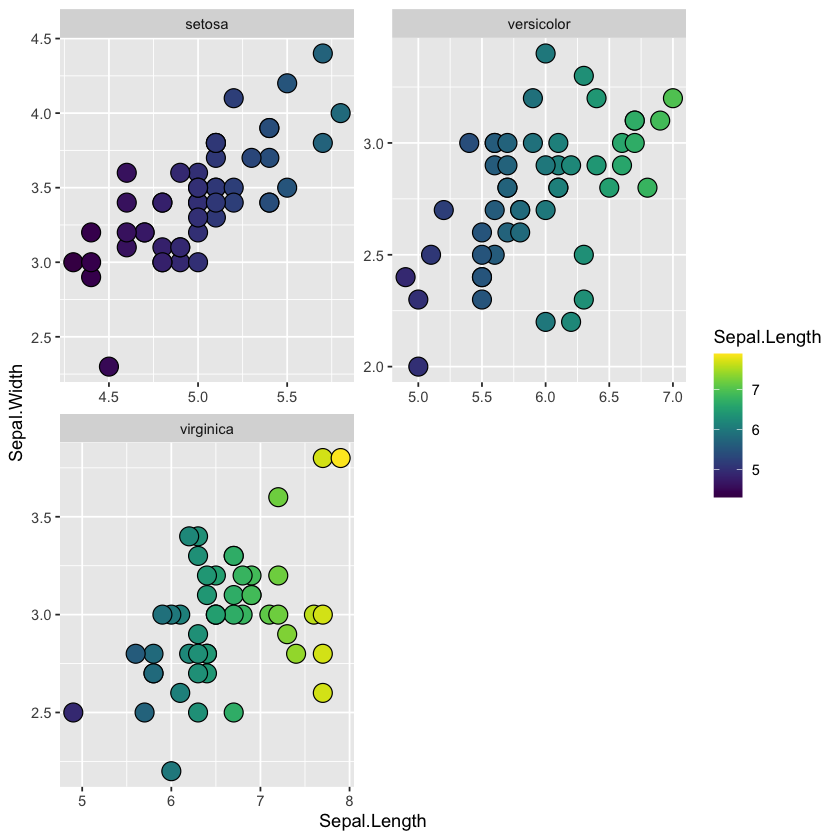

In [64]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21, size = 5) + 
scale_fill_viridis() + facet_wrap(~Species, nrow = 2, ncol = 2, scales = "free")

<a id="11"></a>
### 4. Theme customization
Themes in ggplot allow us to customize the appearance of our plots to fit what we need for our manuscripts or presentations. We can either use preset themes or customize our own. We also can either designate the theme in each plot command or set our theme at the beginning of a script and it will be applied to all plots following that. In this section, we will cover how to format our panels, text, strip headers on faceted plots, and legend formatting.

Before jumping into specifics, let's first see how we implement default themes in a plot command. The first one I want to show is `theme_bw()` which is black and white. This theme will set the background to white and outline of the panel to black in any plot it is applied to. To apply this theme to a plot we can simply add it to the end of a plot command with a `+`.

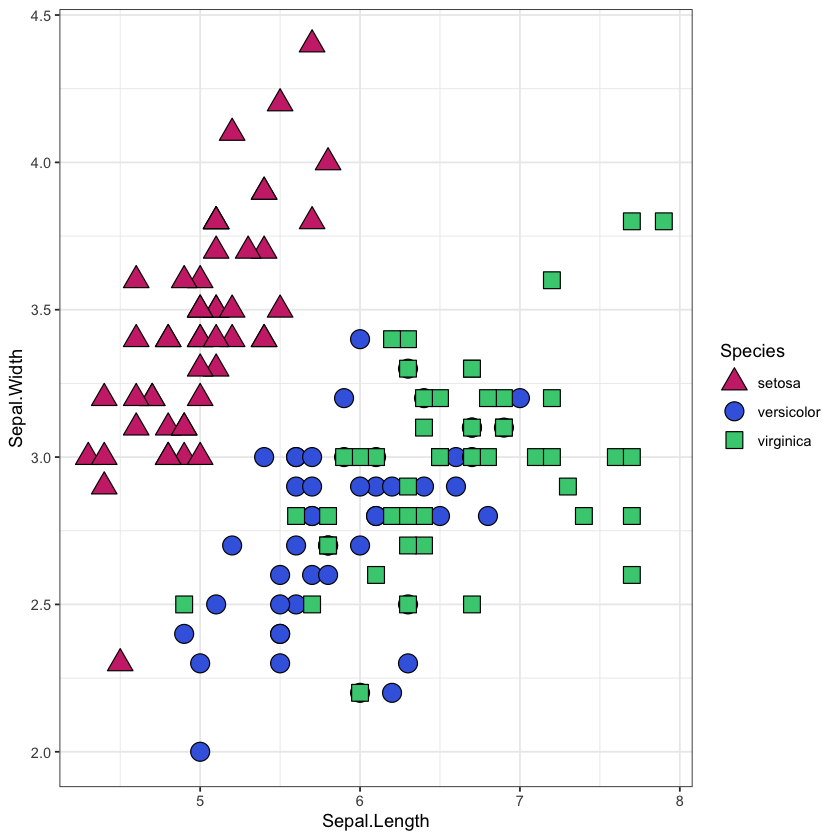

In [65]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw()

Another preset theme you can implement is `theme_void()`. This will remove background color, panel outline, gridlines, and axes from your plot as shown in the following command.

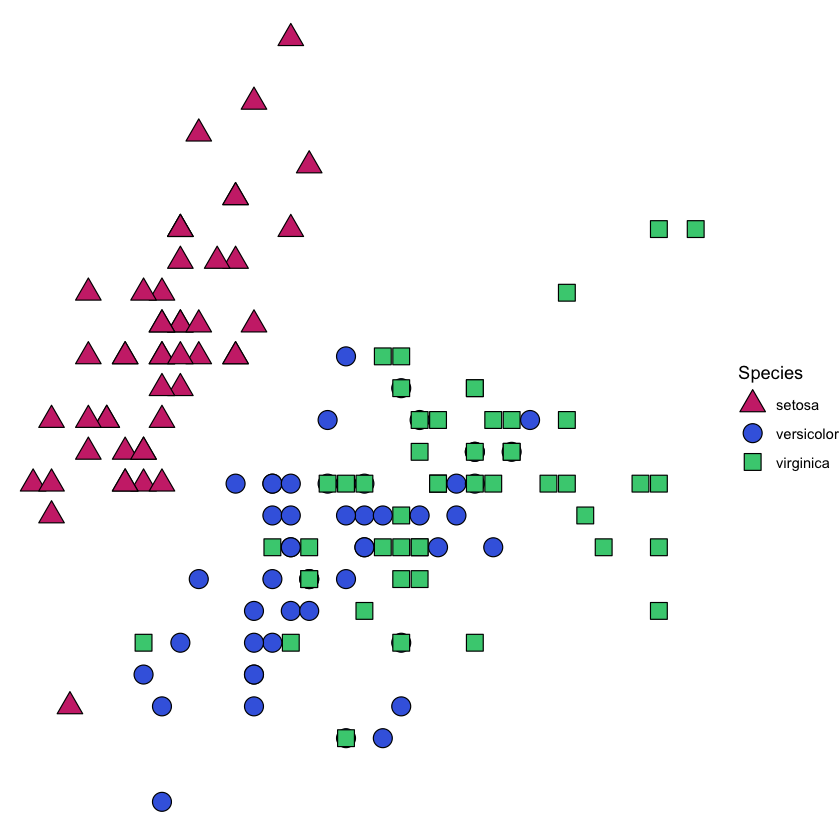

In [66]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_void()

Preset themes may not be exactly what you need for a given plot but can be used as a starting point to customize your theme. The following sections will show you how to customize different portions of the plot using the `theme()` command. 

<a id="12"></a>
#### 4.1 Panel formatting
Overall theme customization in ggplot occurs in the `theme()` command and follows the structure `theme([themeElement] = element[elementType](formattingOptions)`. In ggplot, the panel refers to the plot area. This encompasses background, gridlines, plot outline, and more. Below are a series of commands that show different ways we can use the `theme()` command to customize the panel.

The plot we are going to start with is the scatter plot generated with `theme_bw()` above. The first change we are going to make to this plot is to remove the grid lines. When we are trying to eliminate an element from a plot we do so by implementing `element_blank()`.

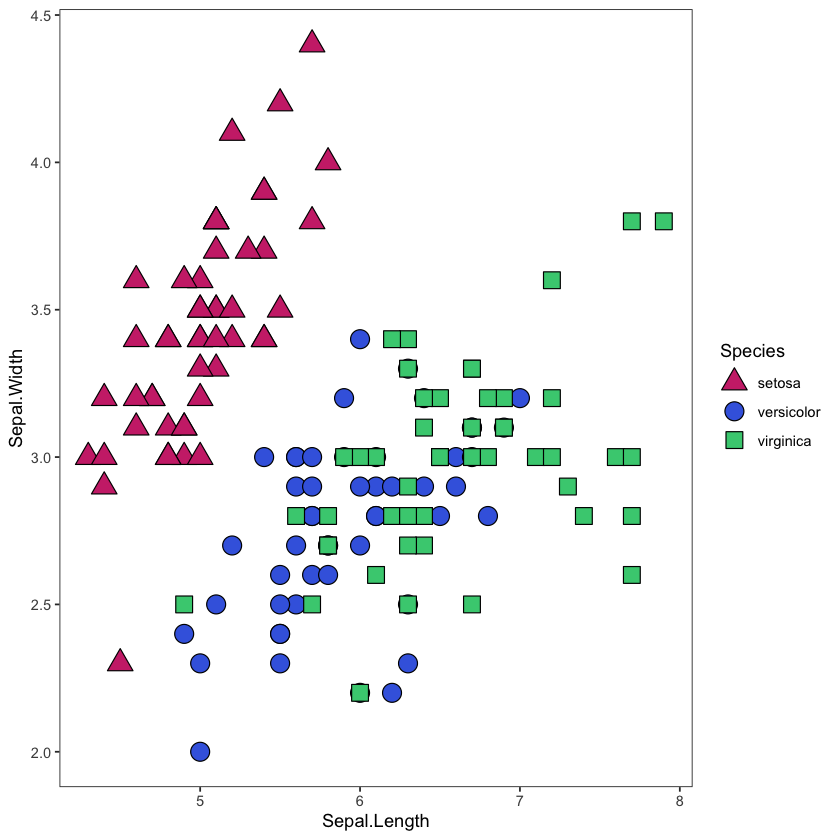

In [67]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank())

If we wanted to keep the gridlines and simply edit the color and thickness of them we we do so by changing `element_blank()` to `element_line()` as shown in the next command.

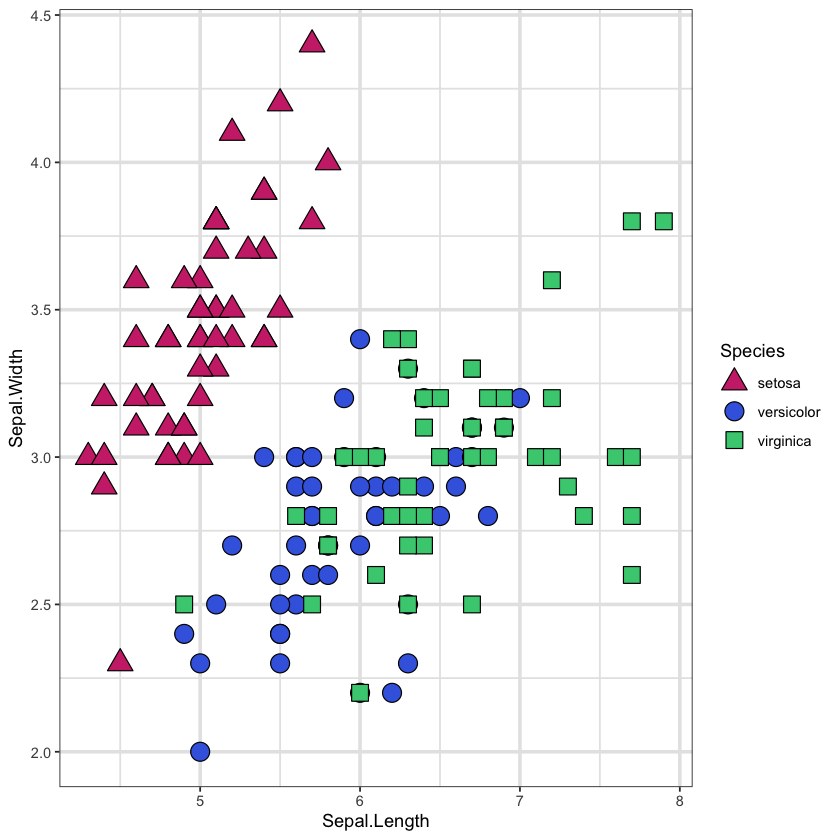

In [89]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_line(color = "grey90", linewidth = 1))

The next element we are going to customize is the panel border. Now, since we are editing a element of the plot instead of eliminating it we will designate the element type when filling in the `theme()` command. In the case of the panel border the element type is `element_rect()`. we will use the `linewidth` option to make the border of the plot thicker.

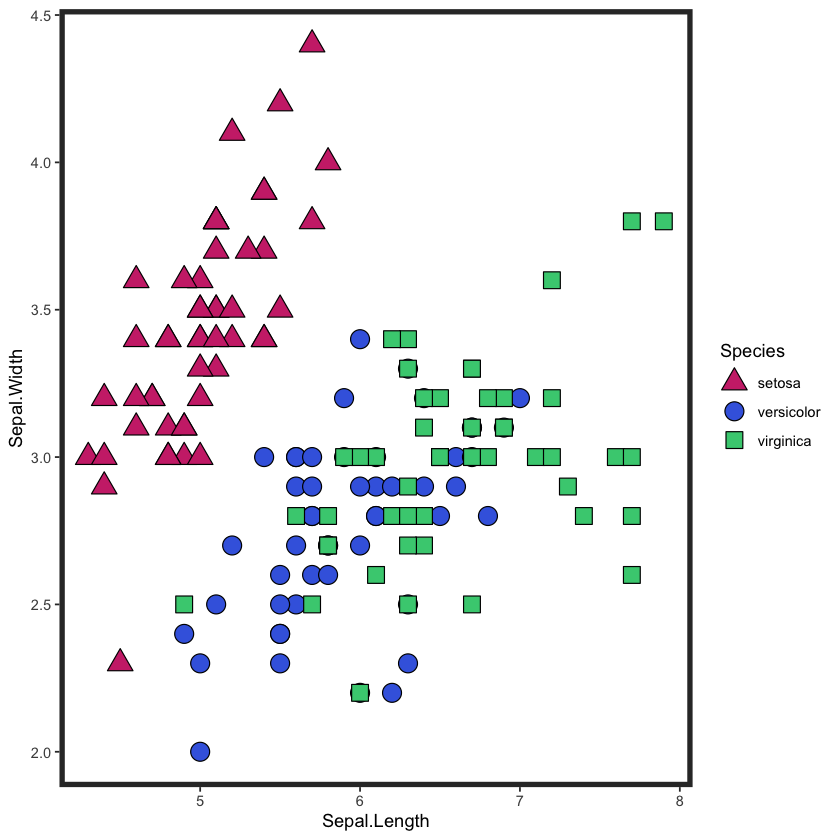

In [90]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 3))

The next element we will change is the panel background. Just like with the panel border the panel background is `element_rect()`. 

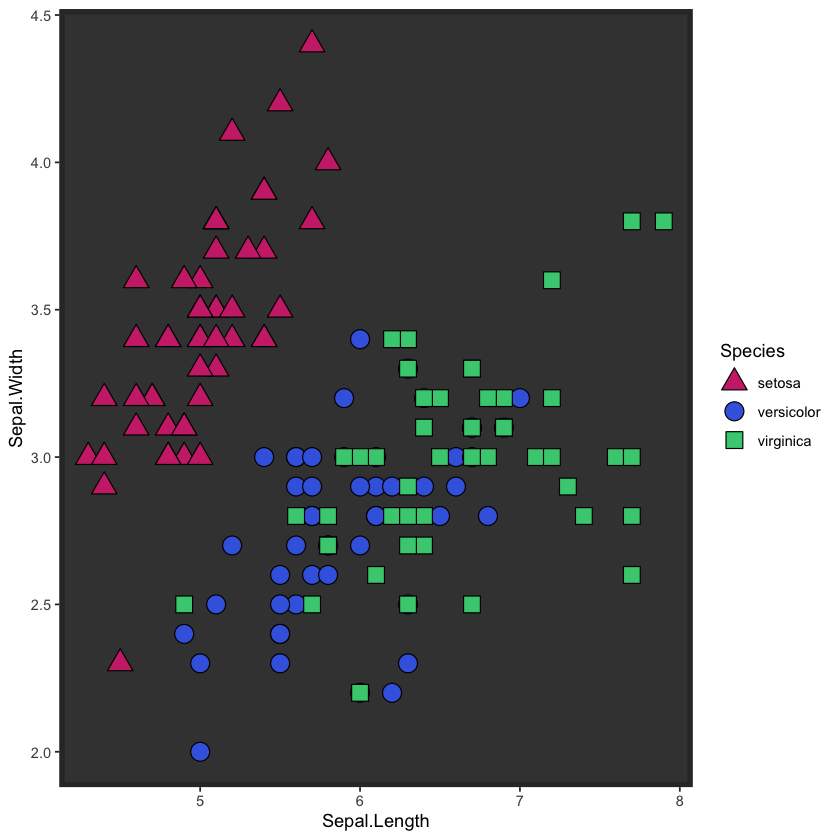

In [91]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 3), 
                   panel.background = element_rect(fill = "grey25"))

<a id="13"></a>
#### 4.2 Text formatting
Text formatting works similar to panel formatting but this time with `element_text()` instead of `element_rect()` or `element_line()`. In the next command, we will change the axis title font face to bold and increase the font size.

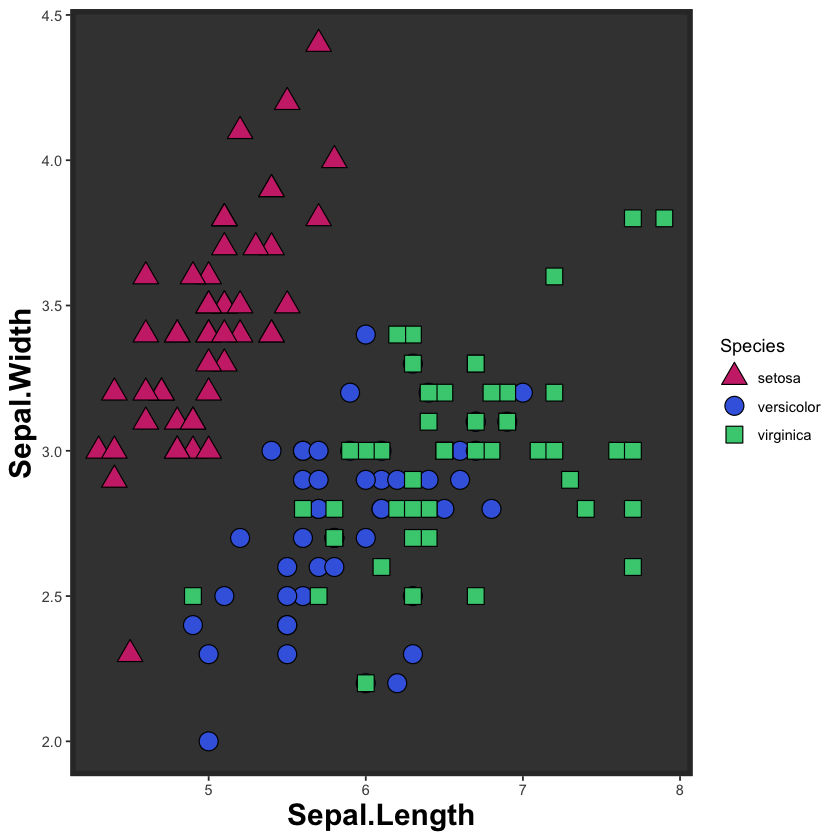

In [96]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 3), 
                   panel.background = element_rect(fill = "grey25")) +
theme(axis.title = element_text(face = "bold", size = 18))

We can also increase the size of the axis text using the same command style.

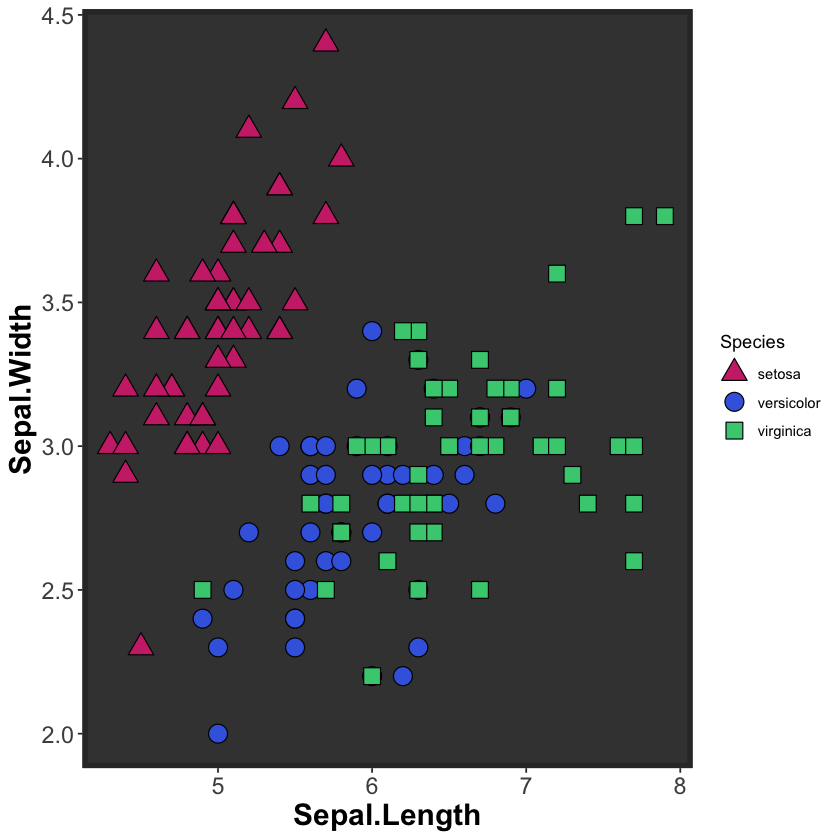

In [97]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 3), 
                   panel.background = element_rect(fill = "grey25")) +
theme(axis.title = element_text(face = "bold", size = 18), axis.text = element_text(size = 14))

We can also edit each axis text separately by adding x and y to the ends of the elements. For example, `axis.title.x` and `axis.title.y` over `axis.title`.

<a id="14"></a>
#### 4.3 Strip formatting
Now we can combine both panel and text formatting to format the strip headers on the top of faceted plots. We will be adjusting one of the faceted plots above to change the color of the strip to black and change the text in the label to white and bold faced. We edit the the strip using `strip.background` and `strip.text`.

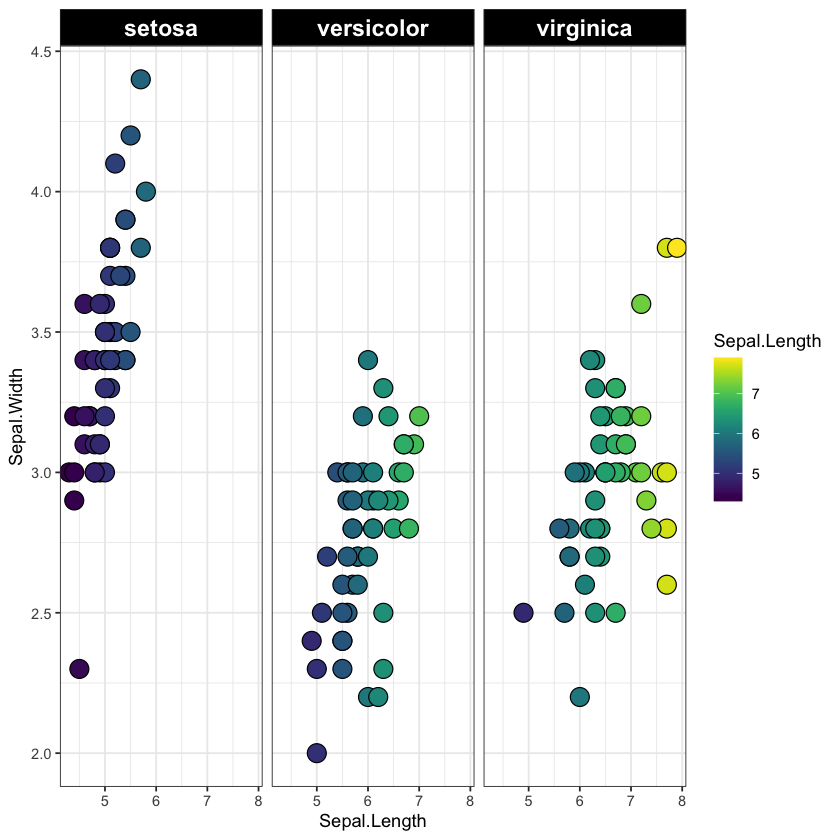

In [99]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Sepal.Length), pch = 21, size = 5) + 
scale_fill_viridis() + facet_grid(~Species) + theme_bw() + 
theme(strip.background = element_rect(fill = "black"), strip.text = element_text(face = "bold", color = "white", size = 14))

<a id="15"></a>
#### 4.3 Legend formatting
Legend formatting can also be done in the `theme()` command. Important legend formatting includes adjusting the position, legend text, and the legend box. When editing the text and aesthetics of the legend we will use the same formatting as we did for the panel and strips. The commands below provide edits to the legend text, removes the background from the legend and adds a black outline to the legend box.

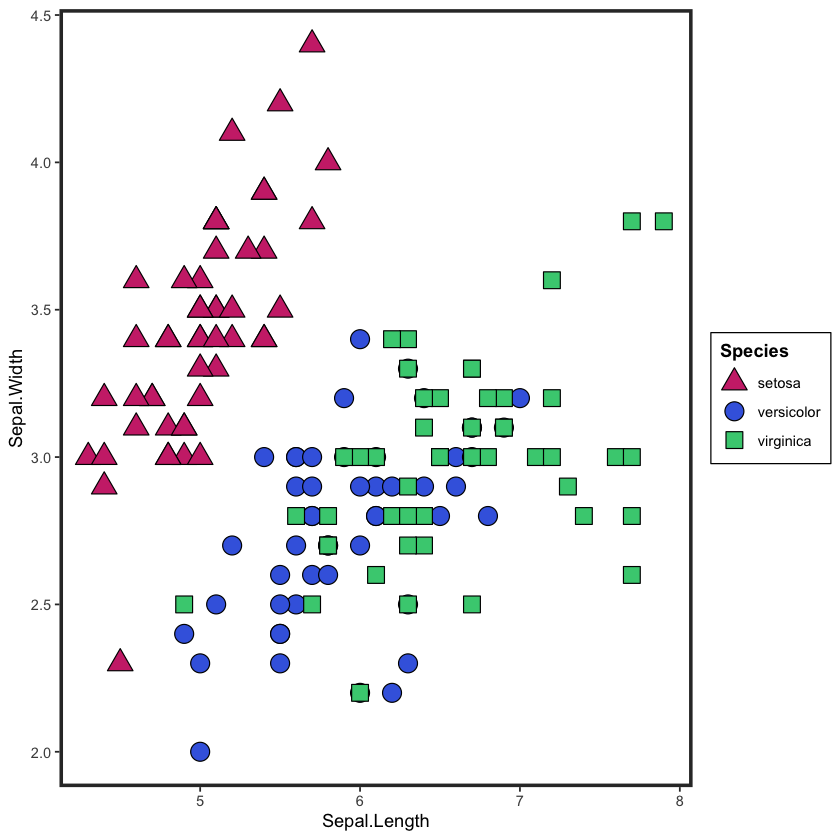

In [104]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold"))

The last legend formatting we are going to do is change the legend position. To do this, we will use the `theme()` command with `legend.position =`. This option will take a directional input, "right", "left", "top", or "bottom". If you wish to get rid of the legend you can enter "none" in the `legend.position =` option. Below are examples of each of these variations.

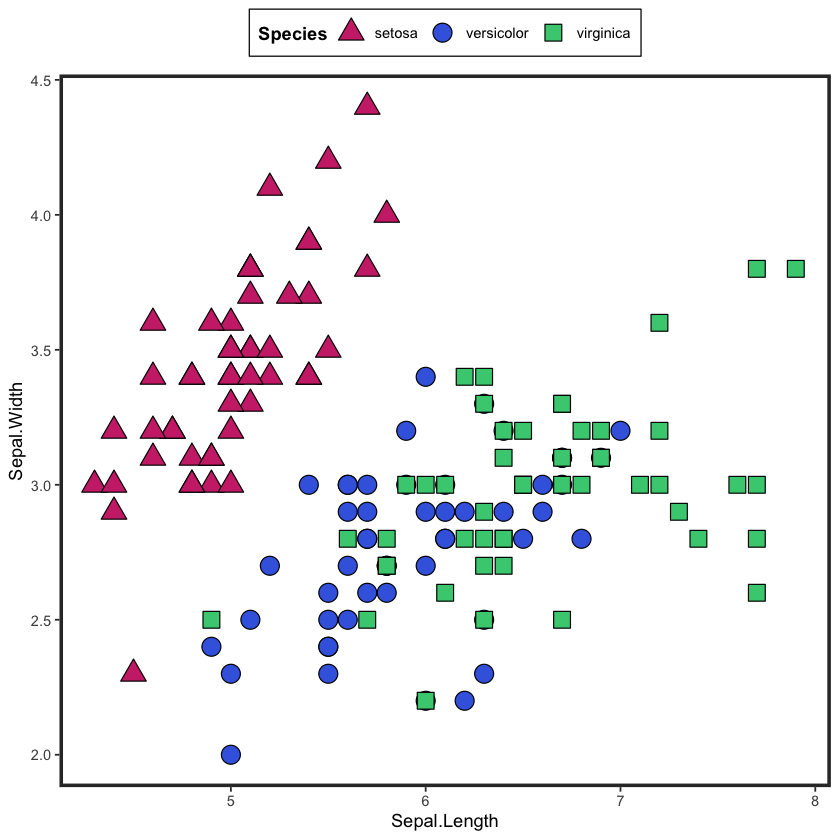

In [105]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold")) +
theme(legend.position = "top")

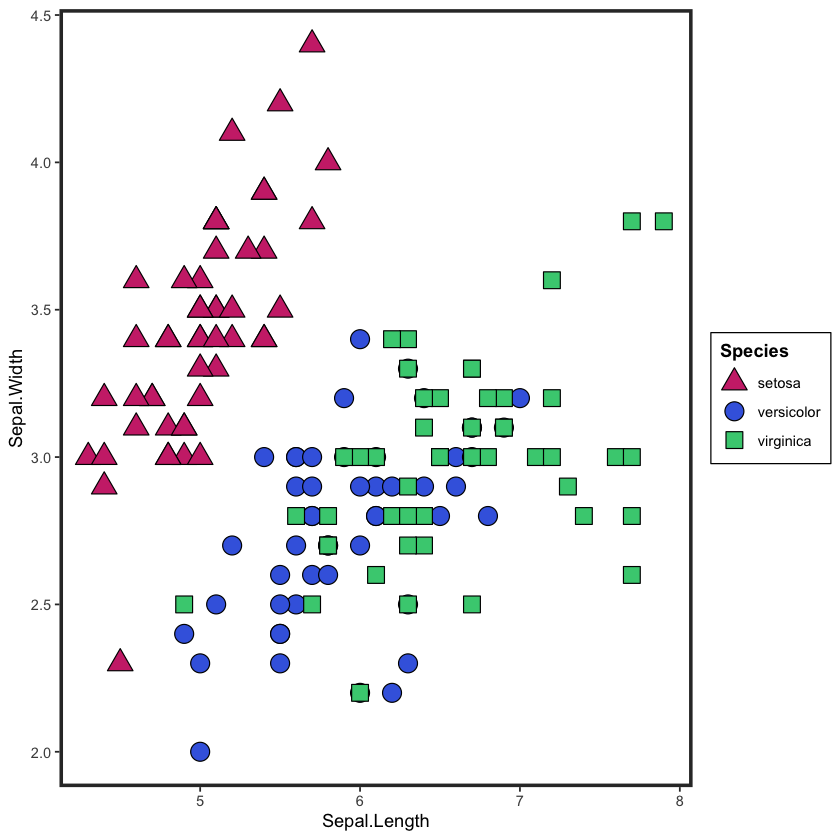

In [106]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold")) +
theme(legend.position = "right")

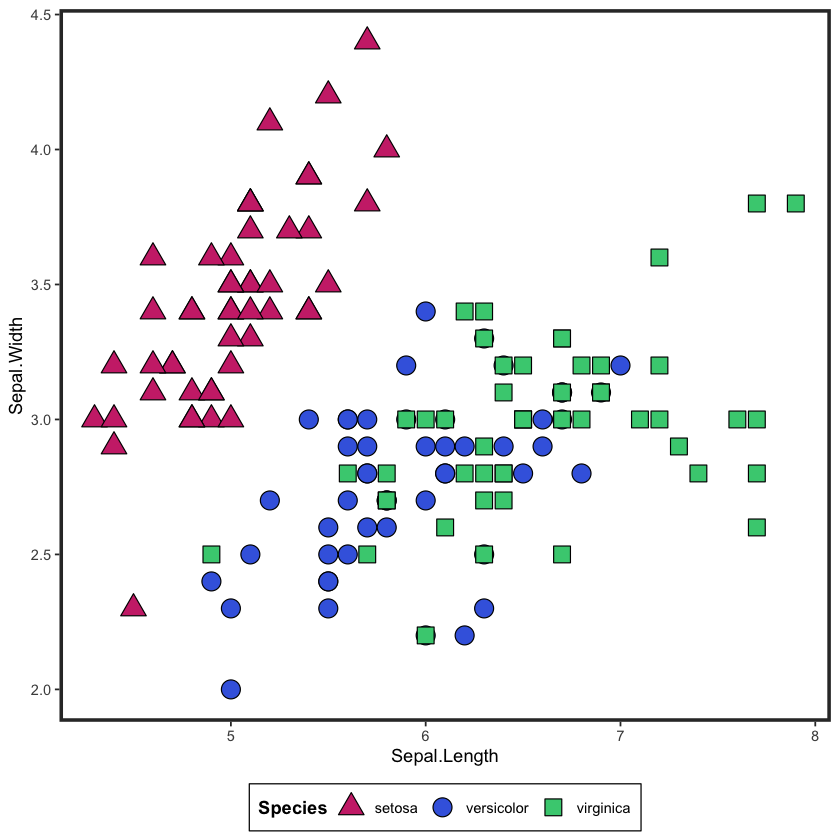

In [107]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold")) +
theme(legend.position = "bottom")

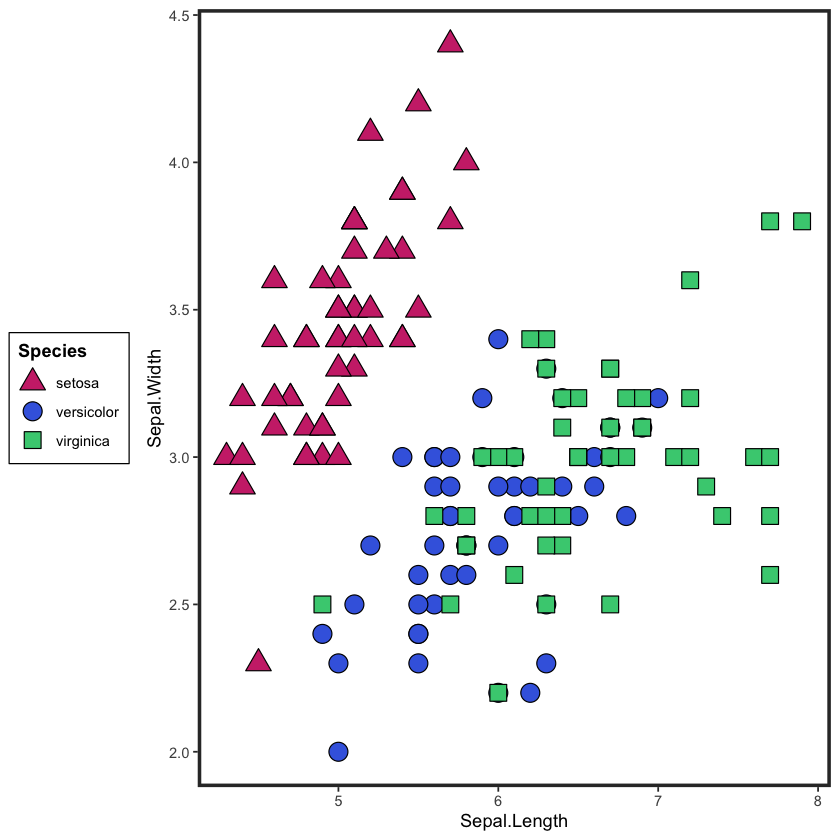

In [108]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold")) +
theme(legend.position = "left")

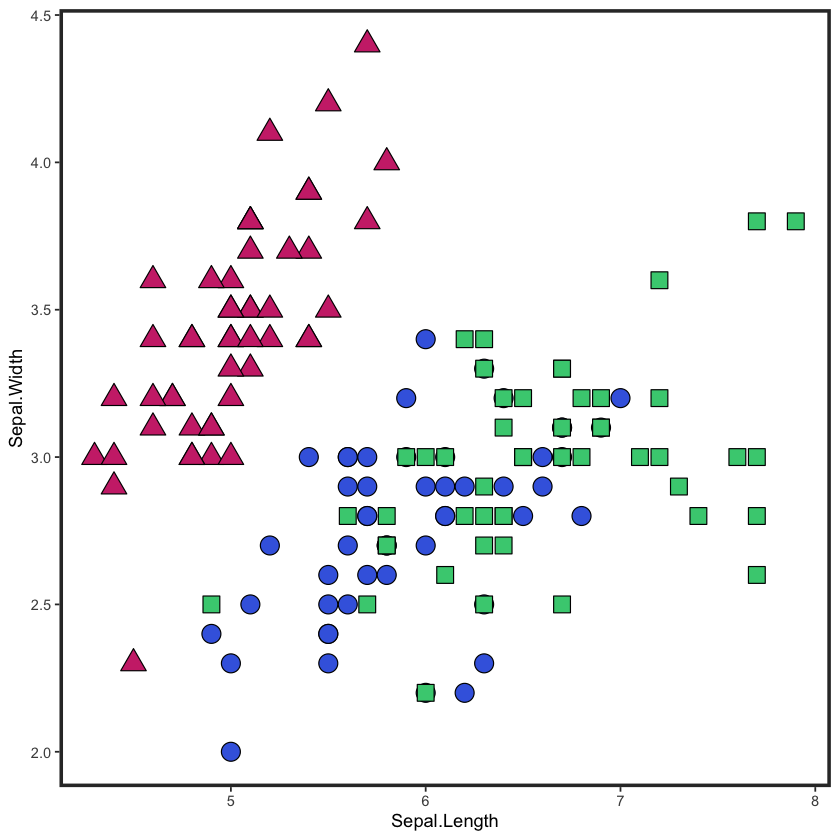

In [109]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold")) +
theme(legend.position = "none")

<a id="16"></a>
#### 4.4 Set theme
Once you have a theme that you know you like and want to apply to multiple graphs you may want to use the set theme command. Once run, this command will set the default theme for all plots following it without having to designate the theme in each individual plot command. Below is an example of how we can set the theme using `theme_set()` and then plot our scatter plot and a boxplot from above without our theme portions of the plot command but achieve the same theme in each plot.

In [34]:
theme_set(theme_bw() + theme(panel.grid = element_blank(), panel.border = element_rect(linewidth = 2)) +
theme(legend.background = element_blank(), legend.box.background = element_rect(color = "black"), legend.title = element_text(face = "bold")) +
theme(legend.position = "none"))

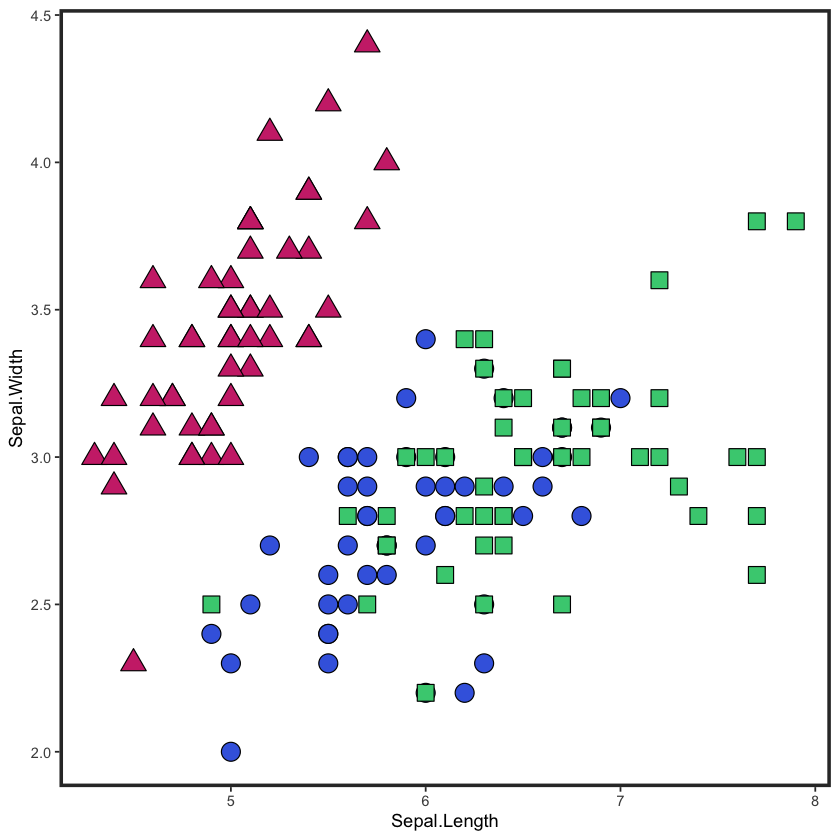

In [35]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24))

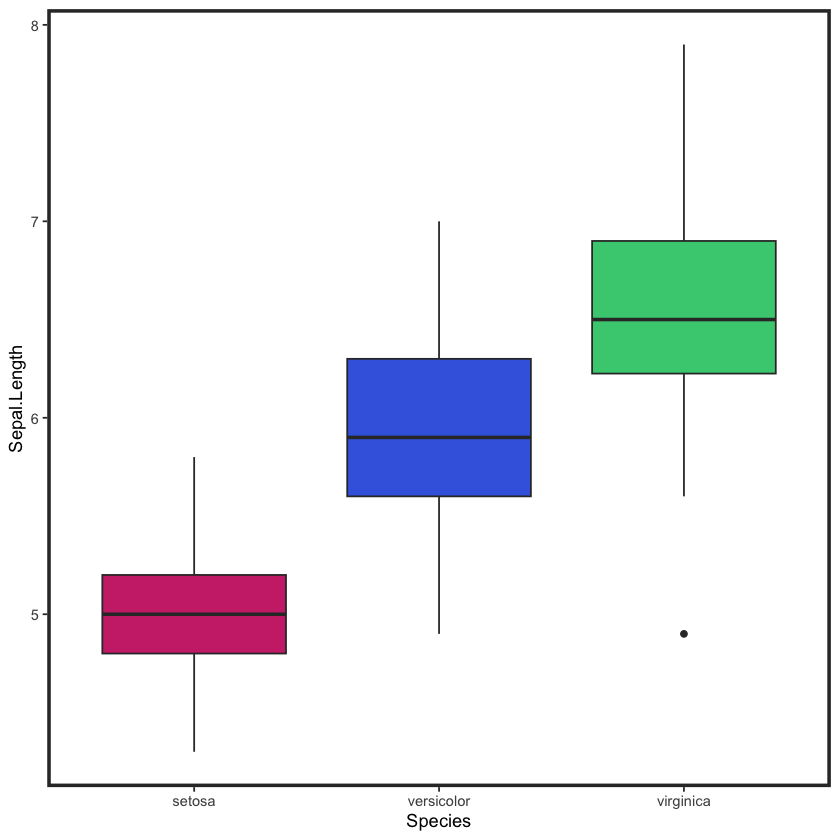

In [36]:
ggplot(iris, aes(Species,Sepal.Length)) + geom_boxplot(aes(fill = Species)) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3"))

<a id="17"></a>
### 5. Axis formatting
Outside of theme you can also customize certain aspects of your plot. One example of this is with your axes. Here I will show you how to use `xlim()` and `ylim()` to customize your axes' ranges and will also show an example of how to set the bottom of your panel to zero for barplots using `scale_y_continuous()`.

The first commands here show how we can set a larger range for our x and y axes on the same scatter plot plotted directly above. This plot has an x range of 4 to 8 and a y range of about 2 to 4.5. To make this larger we are going to set the x axis to 2 to 10 and the y from 1 to 5.

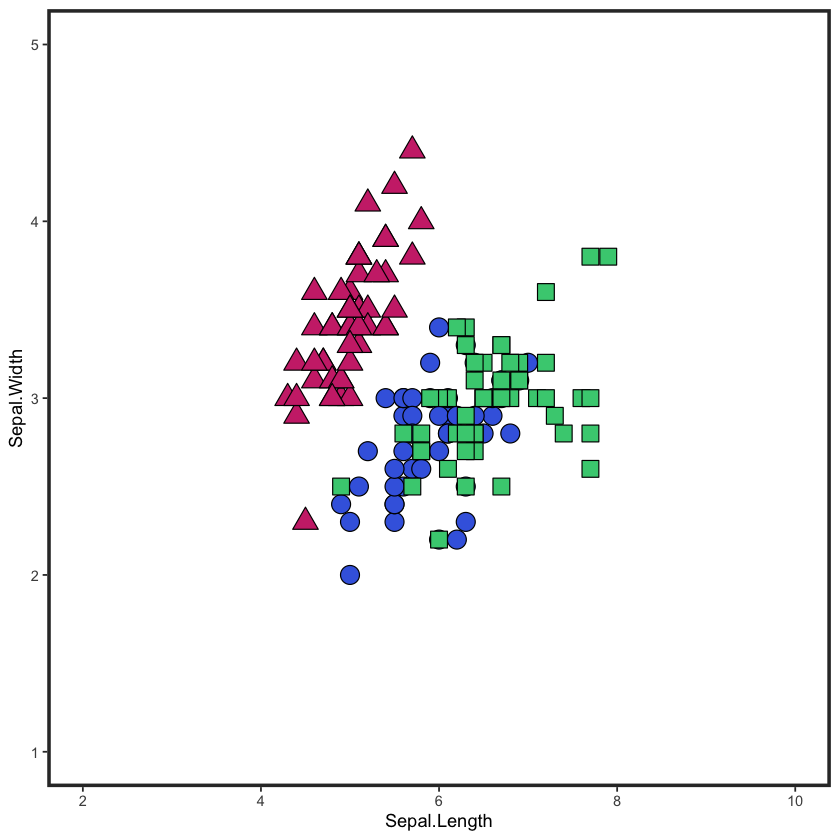

In [37]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
xlim(2,10) + ylim(1,5)

Here you see the same exact graph just more zoomed out. Likewise you could narrow the ranges and zoom in on your points if needed.

The next code is going to plot a histogram of the same dataset filled by species. The default for ggplot is to plot the bars above the edge of the panel box as you see below. 

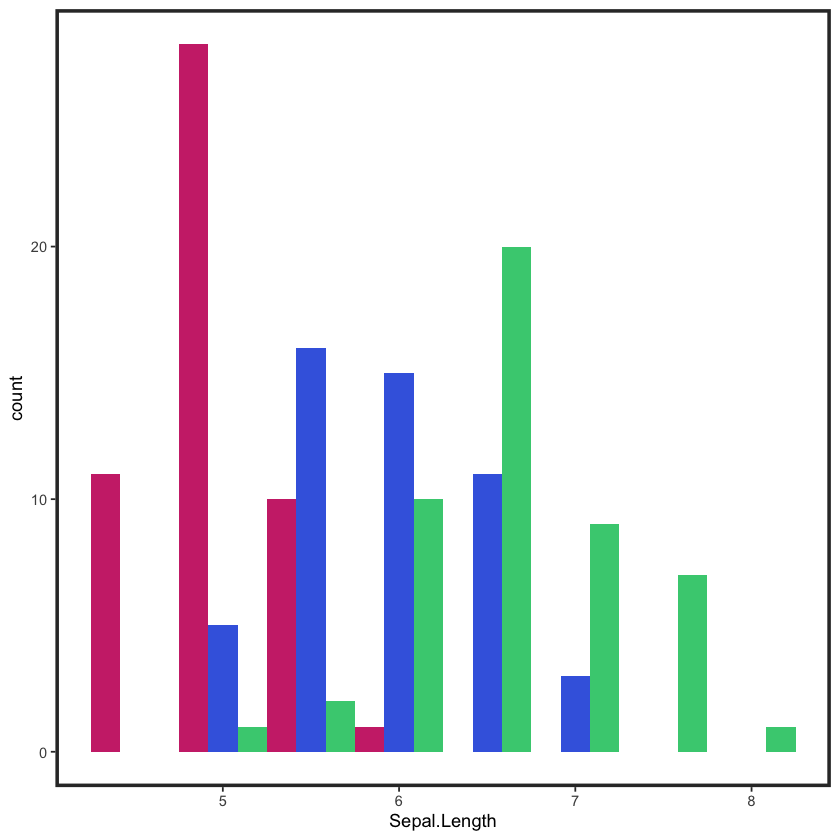

In [38]:
ggplot(iris, aes(x = Sepal.Length)) + geom_histogram(aes(fill = Species), position = "dodge", bins = 20, binwidth = 0.5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24))

To eliminate the gap between the bottom of the panel border and the start of the bars we use `scale_y_continuous()`. The command below demonstrates how to structure this part of the command using expand (to set the origin) and limits (to set the y range).

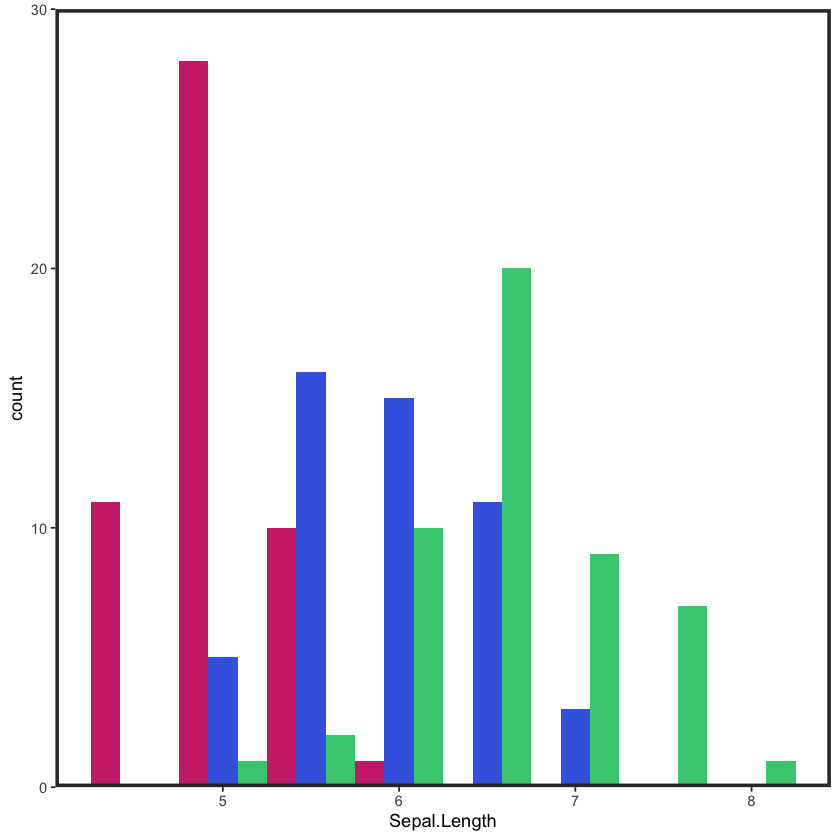

In [39]:
ggplot(iris, aes(x = Sepal.Length)) + geom_histogram(aes(fill = Species), position = "dodge", bins = 20, binwidth = 0.5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
scale_y_continuous(expand = c(0,0), limits = c(0,30))

<a id="18"></a>
### 6. Axes Labels
Next we will cover how to customize your axis labels. The default label is whatever the variable name was in your data frame. But, like you can see in the graphs above, sometimes the text is not exactly as you want it and may include special characters like periods or underscores. To fix this we use `xlab()` and `ylab()`.

Below is the scatter plot command unedited from above. When we plot this we see that the original axis labels contain periods separating the words.

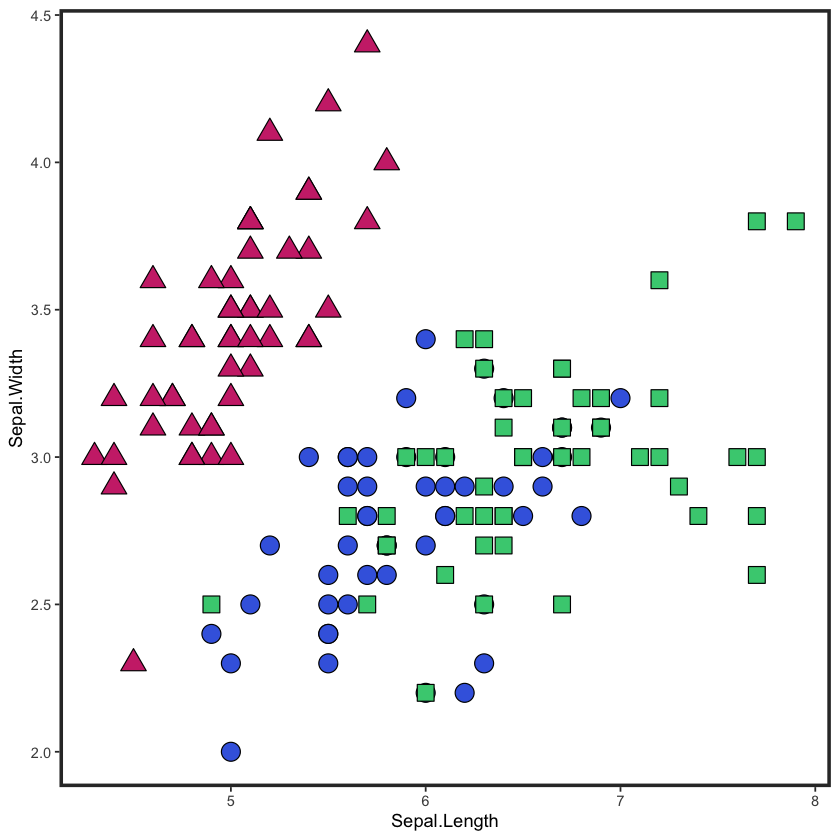

In [41]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24))

The next line of code shows how we can use `xlab()` and `ylab()` to fix these labels and remove those periods and include other necessary information like units.

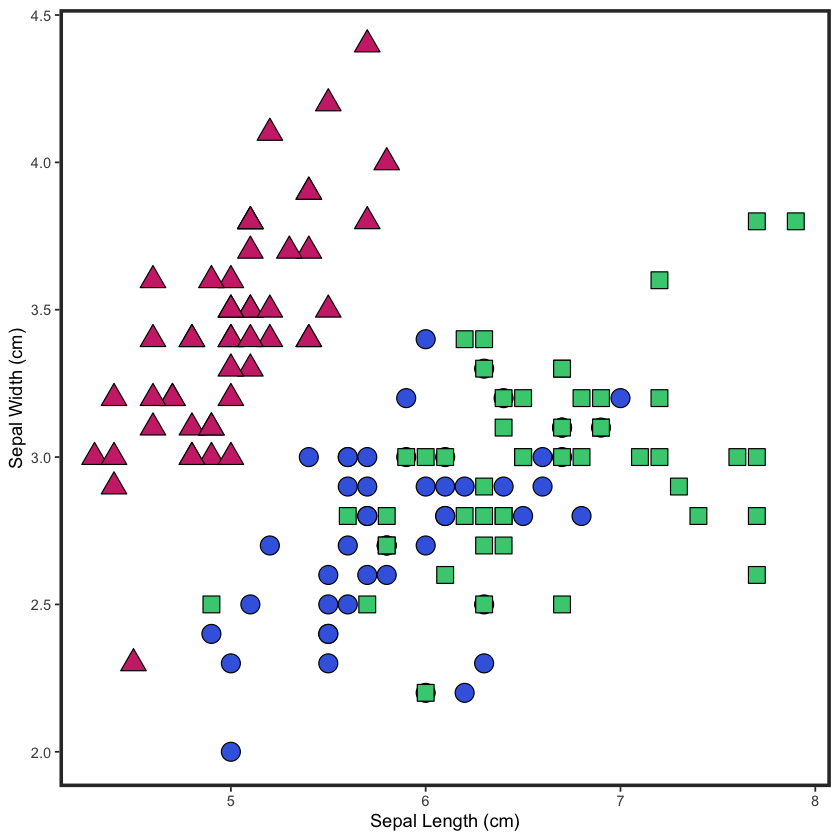

In [42]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
xlab("Sepal Length (cm)") + ylab("Sepal Width (cm)")

Next, you may want to adjust the spacing of the labels which can be done using regular expression. Regular expression allows us to provide characters to represent line breaks (\n), spaces (\s), tabs (\t) and more. If we wanted to move our labels away from the axis slightly we could do this by including a line break in our labels.

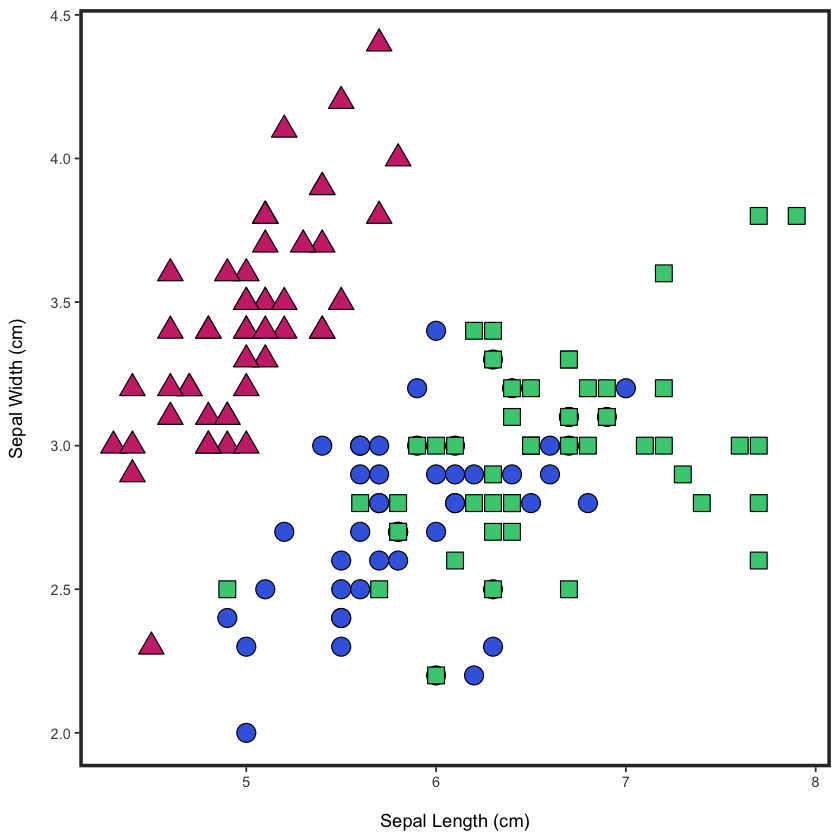

In [43]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
xlab("\nSepal Length (cm)") + ylab("Sepal Width (cm)\n")

If we want units to be on a separate line from the rest of the label we can also insert line breaks in the middle of the label string.

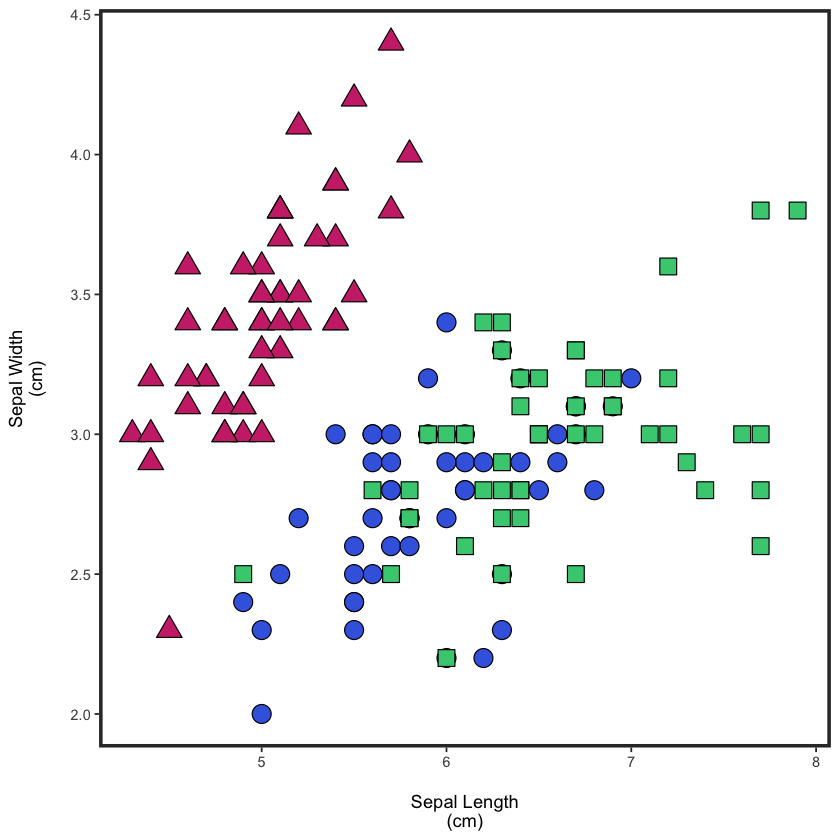

In [44]:
ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
scale_fill_manual(values = c('versicolor' = "royalblue",
                             'virginica'  = "seagreen3",
                             'setosa' = "violetred3")) +
scale_shape_manual(values = c('versicolor' = 21,
                              'virginica' = 22,
                              'setosa' = 24)) + 
xlab("\nSepal Length\n(cm)") + ylab("Sepal Width\n(cm)\n")

Font and other aesthetic formatting of the axes labels can be done in the theme part of the plot command described in section 4.2.

<a id="19"></a>
### 7. Exporting figures
The last thing in this tutorial is exporting figures from R to your computer. To do this with ggplot we use `ggsave()`. This command works a lot nicer than the GUI export image option from R Studio because it allows more customization with the export. The format of this command is `ggsave(filename, plotObject_fromR, height = [integer], width = [integer])`. This command allows you to save in multiple file formats and will interpret the file format from the ending of your filename (e.g. ".png" or ".pdf"). Your next steps with your figure in terms of whether or not you need to still edit it may determine which format will be best for you. This command is also reliant on your plot being saved as an object in your environment. Below I have given an example of how to do this followed by a ggsave command to export the file to my desktop. 

In the first command, we name the plot object "plot" using `plot <-` right before the command and then plot that figure simply by running the name of the plot object in its own line. In the second command, we export that plot as a ".png" file using the `ggsave()` command.

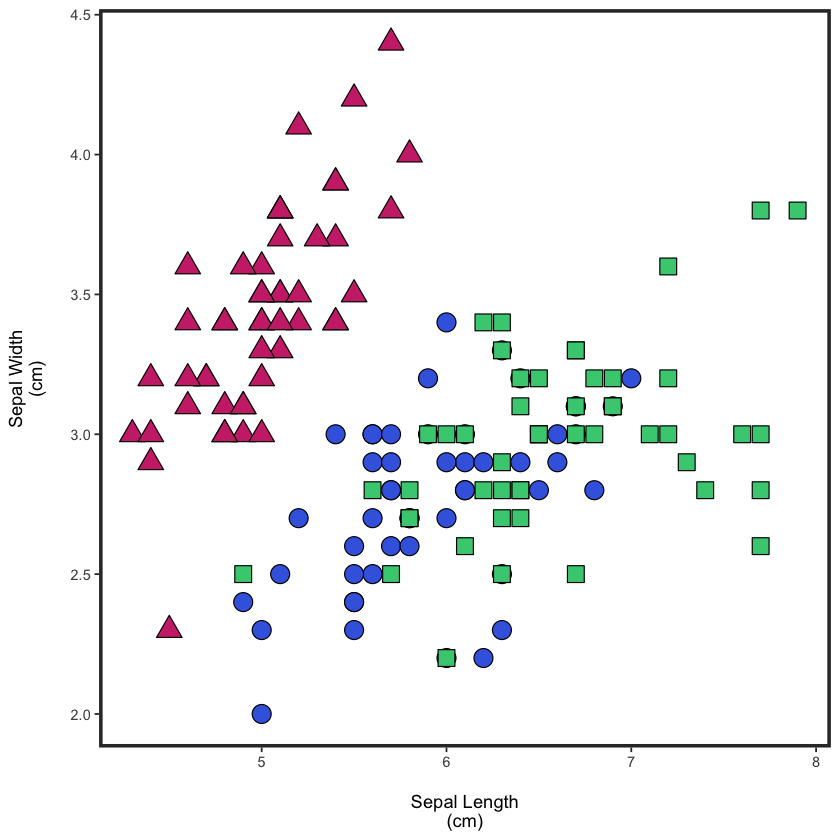

In [46]:
plot <- ggplot(iris, aes(Sepal.Length,Sepal.Width)) + geom_point(aes(fill = Species, pch = Species), size = 5) + 
    scale_fill_manual(values = c('versicolor' = "royalblue",
                                 'virginica'  = "seagreen3",
                                 'setosa' = "violetred3")) +
    scale_shape_manual(values = c('versicolor' = 21,
                                  'virginica' = 22,
                                  'setosa' = 24)) + 
    xlab("\nSepal Length\n(cm)") + ylab("Sepal Width\n(cm)\n")
plot

In [48]:
ggsave("~/Desktop/iris_tutorialPlot.png", plot, height = 7, width = 7)

Finding dimensions that work may take some trial and error.

This tutorial is by no means an exhaustive list of possibilities in ggplot but is meant to hopefully help get you started!